## Import Dependencies and Load in Data At Correct Index

In [1]:
import pandas as pd
import json
import numpy as np
import scipy.stats as st
import statsmodels.api as sm 
import math

In [2]:
df = pd.read_csv('data/model_comparison.csv')
df

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,501808106,bryanchrist,2631956.0,ae9f56f5bc4f6f7cf63f,24740,Classify Questions,37.630,2023-07-18 16:13:14 UTC,NaN,NaN,"{""source"":""api"",""session"":""9a2534a2cdf37064e69...","[{""task"":""T0"",""task_label"":""Is this question s...","{""90771026"":{""retired"":null,""Filename"":""questi...",90771026
1,501808147,bryanchrist,2631956.0,ae9f56f5bc4f6f7cf63f,24740,Classify Questions,37.630,2023-07-18 16:13:27 UTC,NaN,NaN,"{""source"":""api"",""session"":""9a2534a2cdf37064e69...","[{""task"":""T0"",""task_label"":""Is this question s...","{""90771026"":{""retired"":null,""Filename"":""questi...",90771026
2,501808176,bryanchrist,2631956.0,ae9f56f5bc4f6f7cf63f,24740,Classify Questions,37.630,2023-07-18 16:13:36 UTC,NaN,NaN,"{""source"":""api"",""session"":""9a2534a2cdf37064e69...","[{""task"":""T0"",""task_label"":""Is this question s...","{""90771026"":{""retired"":null,""Filename"":""questi...",90771026
3,501808272,bryanchrist,2631956.0,ae9f56f5bc4f6f7cf63f,24740,Classify Questions,37.630,2023-07-18 16:14:12 UTC,NaN,NaN,"{""source"":""api"",""session"":""9a2534a2cdf37064e69...","[{""task"":""T0"",""task_label"":""Is this question s...","{""90771026"":{""retired"":null,""Filename"":""questi...",90771026
4,501809115,bryanchrist,2631956.0,ae9f56f5bc4f6f7cf63f,24740,Classify Questions,37.630,2023-07-18 16:19:32 UTC,NaN,NaN,"{""source"":""api"",""session"":""9a2534a2cdf37064e69...","[{""task"":""T0"",""task_label"":""Is this question s...","{""90771026"":{""retired"":null,""Filename"":""questi...",90771026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,569522662,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:09:58 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222907"":{""retired"":null,""Filename"":""egsm_...",100222907
7135,569522712,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:29 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222854"":{""retired"":null,""Filename"":""egsm_...",100222854
7136,569522755,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:49 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222902"":{""retired"":null,""Filename"":""egsm_...",100222902
7137,569522819,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:11:17 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222861"":{""retired"":null,""Filename"":""egsm_...",100222861


In [3]:
for i in range(0, len(df)):
    my_json = json.loads(df.iloc[i]['annotations'])
    try:
        if my_json[2]['task_label']=='Would you feel comfortable giving this question to a student? Although questions have various difficulties, a middle school student should be able to solve them all.':
            start_index = i
            break
    except:
        pass
df = df[start_index:]
df

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
18,518098408,jkropko,2110353.0,2a1d72f9afd68229e0f8,24740,Classify Questions,109.155,2023-10-24 14:54:44 UTC,NaN,NaN,"{""source"":""api"",""session"":""acac086602c98919e39...","[{""task"":""T0"",""task_label"":""Is this question s...","{""92652903"":{""retired"":{""id"":121033819,""workfl...",92652903
19,518099549,jkropko,2110353.0,855e9c01bf3e71c7f1cd,24740,Classify Questions,109.155,2023-10-24 14:59:42 UTC,NaN,NaN,"{""source"":""api"",""session"":""acac086602c98919e39...","[{""task"":""T0"",""task_label"":""Is this question s...","{""92654135"":{""retired"":{""id"":121038345,""workfl...",92654135
20,518100455,jkropko,2110353.0,f6765ff8fe099d2fc753,24740,Classify Questions,109.155,2023-10-24 15:03:53 UTC,NaN,NaN,"{""source"":""api"",""session"":""acac086602c98919e39...","[{""task"":""T0"",""task_label"":""Is this question s...","{""92652729"":{""retired"":null,""Filename"":""questi...",92652729
21,518157865,bryanchrist,2631956.0,f421b0feb54a520b8983,24740,Classify Questions,109.155,2023-10-24 18:30:06 UTC,NaN,NaN,"{""source"":""api"",""session"":""1609a40925358ed6be2...","[{""task"":""T0"",""task_label"":""Is this question s...","{""92653816"":{""retired"":null,""Filename"":""questi...",92653816
22,518158311,bryanchrist,2631956.0,f421b0feb54a520b8983,24740,Classify Questions,109.155,2023-10-24 18:31:20 UTC,NaN,NaN,"{""source"":""api"",""session"":""1609a40925358ed6be2...","[{""task"":""T0"",""task_label"":""Is this question s...","{""92653934"":{""retired"":{""id"":121031492,""workfl...",92653934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,569522662,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:09:58 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222907"":{""retired"":null,""Filename"":""egsm_...",100222907
7135,569522712,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:29 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222854"":{""retired"":null,""Filename"":""egsm_...",100222854
7136,569522755,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:49 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222902"":{""retired"":null,""Filename"":""egsm_...",100222902
7137,569522819,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:11:17 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222861"":{""retired"":null,""Filename"":""egsm_...",100222861


In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
# Function to extract 'started_at' from JSON string
def extract_started_at(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict.get('started_at')
    except json.JSONDecodeError:
        return None

# Apply the function to the DataFrame column
df['started_at'] = df['metadata'].apply(extract_started_at)

# Convert 'started_at' and 'created_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'])

def extract_finished_at(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict.get('finished_at')
    except json.JSONDecodeError:
        return None

# Apply the function to the DataFrame column
df['finished_at'] = df['metadata'].apply(extract_finished_at)
df['finished_at'] = pd.to_datetime(df['finished_at'])

# Calculate the time difference
df['time_before_submission'] = df['finished_at'] - df['started_at']
df['time_before_submission_seconds'] = df['time_before_submission'].dt.total_seconds()

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1850628593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = df['metadata'].apply(extract_started_at)
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1850628593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1850628593.py:26: SettingWithCopyWarning: 
A value is trying to be set on a c

In [5]:
print(min(df['time_before_submission_seconds']), max(df['time_before_submission_seconds']), df['time_before_submission_seconds'].mean()/60)

4.826 405589.721 3.4827242920001864


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4282714425.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_before_submission_seconds'] = np.where(


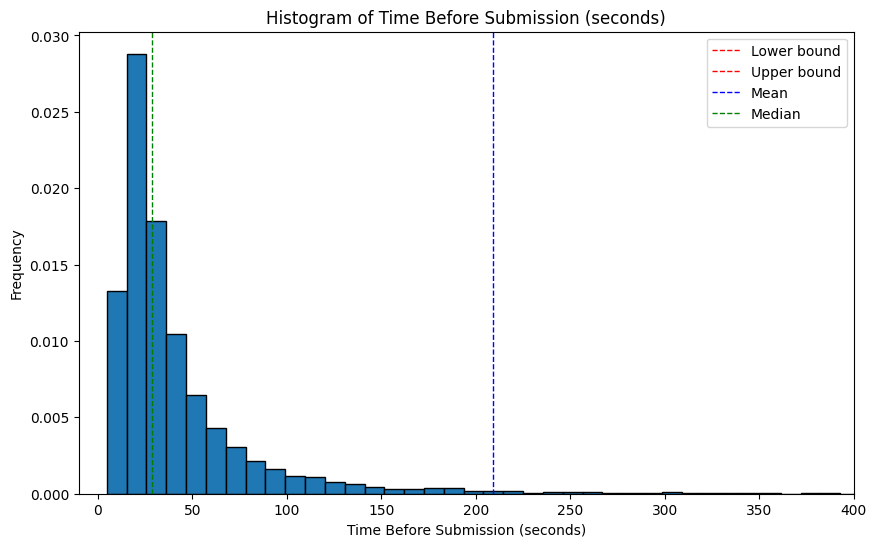

0.7994516055797406

In [6]:
# Calculate the mean and standard deviation
mean_value = df['time_before_submission_seconds'].mean()
std_dev = df['time_before_submission_seconds'].std()

# Define outlier thresholds
lower_bound = mean_value - 2 * std_dev
upper_bound = mean_value + 2 * std_dev

# Calculate the median value
median_value = df['time_before_submission_seconds'].median()

#Replace outliers with the median value
df['time_before_submission_seconds'] = np.where(
    (df['time_before_submission_seconds'] < lower_bound) | (df['time_before_submission_seconds'] > upper_bound),
    median_value,
    df['time_before_submission_seconds']
)

# df['time_before_submission_seconds'] = np.where(
#     (df['time_before_submission_seconds']>60*15),
#     median_value,
#     df['time_before_submission_seconds']
# )
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['time_before_submission_seconds'], bins=500, edgecolor='black', density=True)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower bound')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper bound')
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.title('Histogram of Time Before Submission (seconds)')
plt.xlabel('Time Before Submission (seconds)')
plt.ylabel('Frequency')
plt.xlim(-10, 400)
plt.legend()
plt.show()

df['time_before_submission_seconds'].mean()/60

# Identify outliers using the IQR method
Q1 = df['time_before_submission_seconds'].quantile(0.25)
Q3 = df['time_before_submission_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
df['time_before_submission_seconds'] = np.where(
    (df['time_before_submission_seconds'] < lower_bound) | (df['time_before_submission_seconds'] > upper_bound),
    median_value,
    df['time_before_submission_seconds']
)

plt.figure(figsize=(10, 6))
plt.hist(df['time_before_submission_seconds'], bins=500, edgecolor='black', density=True)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower bound')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper bound')
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.title('Histogram of Time Before Submission (seconds)')
plt.xlabel('Time Before Submission (seconds)')
plt.ylabel('Frequency')
plt.xlim(-1, 200)
plt.legend()
plt.show()

df['time_before_submission_seconds'].mean()/60

In [7]:
minutes = df['time_before_submission_seconds'].sum()/60
hours = minutes/60
hours

94.88158138888888

In [8]:
print(upper_bound, lower_bound)

15938.513482780481 -15520.58656774046


In [9]:
for i in range(0, len(df)):
    my_json = json.loads(df.iloc[i]['annotations'])
    try:
        if my_json[2]['task_label']=='What math operations/concepts are required to solve the problem? Please select all that apply. ':
            start_index = i
            break
    except:
        pass
df = df[start_index:]
df

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,started_at,finished_at,time_before_submission,time_before_submission_seconds
4798,526544790,bryanchrist,2631956.0,ff94844f8d02438fc2de,24740,Classify Questions,139.206,2023-12-03 17:59:21 UTC,True,owner,"{""source"":""api"",""session"":""777a08164cd7f8e01a2...","[{""task"":""T0"",""task_label"":""Is this question s...","{""94323602"":{""retired"":null,""Filename"":""llama_...",94323602,2023-12-03 17:58:00.350000+00:00,2023-12-03 17:59:20.297000+00:00,0 days 00:01:19.947000,79.947
4799,526686902,not-logged-in-00e88c5e282e4808215d,NaN,00e88c5e282e4808215d,24740,Classify Questions,139.206,2023-12-04 12:46:57 UTC,NaN,NaN,"{""source"":""api"",""session"":""6a2fe65aa1413a34ff5...","[{""task"":""T0"",""task_label"":""Is this question s...","{""94323999"":{""retired"":null,""Filename"":""mammot...",94323999,2023-12-04 12:44:02.301000+00:00,2023-12-04 12:46:53.021000+00:00,0 days 00:02:50.720000,170.720
4800,526687176,not-logged-in-5492127f512cd4b4e199,NaN,5492127f512cd4b4e199,24740,Classify Questions,139.206,2023-12-04 12:49:34 UTC,NaN,NaN,"{""source"":""api"",""session"":""6a2fe65aa1413a34ff5...","[{""task"":""T0"",""task_label"":""Is this question s...","{""94323887"":{""retired"":null,""Filename"":""llema_...",94323887,2023-12-04 12:47:04.270000+00:00,2023-12-04 12:49:29.649000+00:00,0 days 00:02:25.379000,145.379
4801,526687284,not-logged-in-78696b49edf77424ae47,NaN,78696b49edf77424ae47,24740,Classify Questions,139.206,2023-12-04 12:50:58 UTC,NaN,NaN,"{""source"":""api"",""session"":""6a2fe65aa1413a34ff5...","[{""task"":""T0"",""task_label"":""Is this question s...","{""94323658"":{""retired"":null,""Filename"":""llama_...",94323658,2023-12-04 12:49:34.509000+00:00,2023-12-04 12:50:50.005000+00:00,0 days 00:01:15.496000,75.496
4802,526687346,not-logged-in-0bbf570415305d110dce,NaN,0bbf570415305d110dce,24740,Classify Questions,139.206,2023-12-04 12:51:38 UTC,NaN,NaN,"{""source"":""api"",""session"":""6a2fe65aa1413a34ff5...","[{""task"":""T0"",""task_label"":""Is this question s...","{""94323967"":{""retired"":null,""Filename"":""mammot...",94323967,2023-12-04 12:50:53.835000+00:00,2023-12-04 12:51:36.455000+00:00,0 days 00:00:42.620000,42.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,569522662,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:09:58 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222907"":{""retired"":null,""Filename"":""egsm_...",100222907,2024-06-25 21:09:36.145000+00:00,2024-06-25 21:09:58.395000+00:00,0 days 00:00:22.250000,22.250
7135,569522712,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:29 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222854"":{""retired"":null,""Filename"":""egsm_...",100222854,2024-06-25 21:09:59.194000+00:00,2024-06-25 21:10:29.326000+00:00,0 days 00:00:30.132000,30.132
7136,569522755,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:49 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222902"":{""retired"":null,""Filename"":""egsm_...",100222902,2024-06-25 21:10:30.379000+00:00,2024-06-25 21:10:49.599000+00:00,0 days 00:00:19.220000,19.220
7137,569522819,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:11:17 UTC,NaN,NaN,"{""source"":""api"",""session"":""79416595f7756f3a0bd...","[{""task"":""T0"",""task_label"":""Is this question s...","{""100222861"":{""retired"":null,""Filename"":""egsm_...",100222861,2024-06-25 21:10:50.467000+00:00,2024-06-25 21:11:16.95

## Create Appropriateness, Solvability, Accuracy, Topic, Math Operation and Notes Columns

In [10]:
my_json = json.loads(df.iloc[0]['annotations'])
my_json

[{'task': 'T0',
  'task_label': 'Is this question solvable? A solvable question means that it can be solved with the information present. ',
  'value': 'Yes'},
 {'task': 'T4',
  'task_label': 'Is the solution for this question correct?',
  'value': 'Yes'},
 {'task': 'T6',
  'task_label': 'What math operations/concepts are required to solve the problem? Please select all that apply. ',
  'value': ['Subtraction', 'Addition']},
 {'task': 'T1',
  'task_label': 'Would you feel comfortable giving this question to a student? Although questions have various difficulties, a middle school student should be able to solve them all.',
  'value': 'Yes: This question is understandable, appropriate and a middle school student or younger could solve it '},
 {'task': 'T5',
  'task_label': 'Does the question incorporate the given topic? ',
  'value': 'Yes'},
 {'task': 'T3',
  'value': '',
  'task_label': 'This question is optional. If you have any feedback about this particular question, you can tell us 

In [11]:
solvability = []
accuracy = []
appropriateness = []
topic = []
ops = []
notes = []
for i in range(0, len(df)):
    my_json = json.loads(df.iloc[i]['annotations'])
    solvability.append(my_json[0]['value'])
    if my_json[1]['task']=='T4':
        accuracy.append(my_json[1]['value'])
    if my_json[1]['task']!='T4':
        accuracy.append("NA")
        appropriateness.append('NA')
        ops.append('NA')
        topic.append(my_json[1]['value'])
    if my_json[2]['task']=='T6':
        ops.append(my_json[2]['value'])
    if my_json[2]['task']!='T6':
        notes.append(my_json[2]['value'])
    try:
        appropriateness.append(my_json[3]['value'])
        topic.append(my_json[4]['value'])
        notes.append(my_json[5]['value'])
    except:
        pass
df['solvability']=solvability
df['appropriateness']=appropriateness
df['accuracy']=accuracy
df['operations'] = ops
df['notes']=notes
df['topic']=topic

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/2447154829.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['solvability']=solvability
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/2447154829.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['appropriateness']=appropriateness
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/2447154829.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [12]:
df['user_name'].value_counts()

user_name
bryanchrist                           1855
kidleader                              149
Raceaturtle                            135
not-logged-in-34858847a27dc295dc4c      23
not-logged-in-37eaa85ee230bfa2a603      18
not-logged-in-371439ba1c8e73f3a8d1      16
not-logged-in-2d2a2f854c48bf00f8e5      12
not-logged-in-072f1f8d044ec7dca604       9
not-logged-in-40892b8368f2b73d20b2       8
not-logged-in-90692de386d12c5fd1b3       7
not-logged-in-ef5c7d339fcc11e495c2       7
not-logged-in-5b8334b38083ab2e4332       6
not-logged-in-e82d7d84a825d538203f       6
not-logged-in-2c506ecc5bc94ef91b72       5
not-logged-in-d86c76279553ecff5f3d       5
not-logged-in-1603d09ef9f8f37d2f5a       5
not-logged-in-29b84fd4e4bf2bbfa471       5
not-logged-in-6ddd6c8f0c2d42b78678       5
not-logged-in-91c294a79fa0c7a81fa9       5
not-logged-in-d9374e8e606a430e4111       5
not-logged-in-a5eb3b44fb137d1417df       4
cate11                                   4
not-logged-in-a8d51607a4f4a1b6f36a       4
n

df = df[df['user_name']=='bryanchrist']
df

In [13]:
temp = df[df['notes']!=""]
temp

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,started_at,finished_at,time_before_submission,time_before_submission_seconds,solvability,appropriateness,accuracy,operations,notes,topic
4799,526686902,not-logged-in-00e88c5e282e4808215d,NaN,00e88c5e282e4808215d,24740,Classify Questions,139.206,2023-12-04 12:46:57 UTC,NaN,NaN,...,2023-12-04 12:44:02.301000+00:00,2023-12-04 12:46:53.021000+00:00,0 days 00:02:50.720000,170.720,Yes,"Yes: This question is understandable, appropri...",Yes,"[Subtraction, Addition]",The question is too simplistic,Yes
4800,526687176,not-logged-in-5492127f512cd4b4e199,NaN,5492127f512cd4b4e199,24740,Classify Questions,139.206,2023-12-04 12:49:34 UTC,NaN,NaN,...,2023-12-04 12:47:04.270000+00:00,2023-12-04 12:49:29.649000+00:00,0 days 00:02:25.379000,145.379,Yes,No: This question contains distracting typos o...,No,[Division],There is a contradiction in the question,Yes
4805,526687683,not-logged-in-86a6625b42b40509c616,NaN,86a6625b42b40509c616,24740,Classify Questions,139.206,2023-12-04 12:55:30 UTC,NaN,NaN,...,2023-12-04 12:54:14.652000+00:00,2023-12-04 12:55:25.270000+00:00,0 days 00:01:10.618000,70.618,No,NA,NA,NA,The meaning of this question is unclear,No
5713,528390771,not-logged-in-855e9c01bf3e71c7f1cd,NaN,855e9c01bf3e71c7f1cd,24740,Classify Questions,142.214,2023-12-11 13:43:37 UTC,NaN,NaN,...,2023-12-11 13:41:59.394000+00:00,2023-12-11 13:43:37.525000+00:00,0 days 00:01:38.131000,98.131,Yes,"Yes: This question is understandable, appropri...",Yes,[Subtraction],The extra steps 2-4 are unnecessary and may ca...,Yes
5716,528391151,not-logged-in-8211d809e28a550a5fec,NaN,8211d809e28a550a5fec,24740,Classify Questions,142.214,2023-12-11 13:46:02 UTC,NaN,NaN,...,2023-12-11 13:44:28.621000+00:00,2023-12-11 13:46:02.234000+00:00,0 days 00:01:33.613000,93.613,Yes,"Yes: This question is understandable, appropri...",No,"[Division, Multiplication]",The lift 2000 pounds is superfluous,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,550976754,Raceaturtle,2668246.0,735db901a23dc679744e,24740,Classify Questions,142.214,2024-03-28 14:18:32 UTC,NaN,NaN,...,2024-03-28 14:17:09.305000+00:00,2024-03-28 14:18:32.098000+00:00,0 days 00:01:22.793000,82.793,No,NA,NA,NA,You need all the raw numbers to calculate aver...,Yes
6638,550976927,Raceaturtle,2668246.0,735db901a23dc679744e,24740,Classify Questions,142.214,2024-03-28 14:19:30 UTC,NaN,NaN,...,2024-03-28 14:18:33.186000+00:00,2024-03-28 14:19:30.682000+00:00,0 days 00:00:57.496000,57.496,No,NA,NA,NA,Numbers given don’t add up,Yes
6643,550977726,Raceaturtle,2668246.0,3c42f8f4af149edf1e97,24740,Classify Questions,142.214,2024-03-28 14:24:21 UTC,NaN,NaN,...,2024-03-28 14:23:14.701000+00:00,2024-03-28 14:24:21.701000+00:00,0 days 00:01:07,67.000,No,NA,NA,NA,Unclear if the q is asking area or perimeter,Yes
6798,551078982,Raceaturtle,2668246.0,7d857a10d8b8aa97ac2a,24740,Classify Questions,142.214,2024-03-28 21:15:53 UTC,NaN,NaN,...,2024-03-28 21:14:29.524000+00:00,2024-03-28 21:15:53.056000+00:00,0 days 00:01:23.532000,83.532,Yes,"Yes: This question is understandable, appropri...",No,[Fractions],8,Yes


## Assign Question Numbers

In [14]:
question_numbers = []
model = []

for i in range(len(df)):
    my_json = json.loads(df.iloc[i]['subject_data'])
    subject_id = df.iloc[i]['subject_ids']
    question_number = my_json[f'{subject_id}']['Filename']
    question_number = question_number.split(".txt")[0]
    question_numbers.append(question_number)

    if 'llema' in question_number:
        model.append('llema')
    elif 'llama' in question_number and 'llama_gsm' not in question_number:
        model.append('llama')    
    elif 'mammoth' in question_number:
        model.append('mammoth')
    elif 'mathwell' in question_number:
        model.append('mathwell')
    elif 'gpt35' in question_number: 
        model.append('gpt35')

    elif 'gpt4' in question_number: 
        model.append('gpt4')

    elif "llama_gsm" in question_number:
        model.append("llama_gsm")

    elif "egsm_only" in question_number:
        model.append("egsm_only")
    else:
        # Append None if none of the models are found in question_number
        model.append(None)

# Create a DataFrame with question_numbers and model lists
df['question_number'] = question_numbers
new_df = pd.DataFrame({'question_number': question_numbers, 'model': model})
new_df = new_df.drop_duplicates()
# Filter out rows where model is not None
filtered_df = new_df[new_df['model'].notna()]

# Merge the filtered DataFrame with the original DataFrame df
df = pd.merge(df, filtered_df, on='question_number', how='inner')

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/107389611.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question_number'] = question_numbers


In [15]:
df

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,time_before_submission,time_before_submission_seconds,solvability,appropriateness,accuracy,operations,notes,topic,question_number,model
0,526544790,bryanchrist,2631956.0,ff94844f8d02438fc2de,24740,Classify Questions,139.206,2023-12-03 17:59:21 UTC,True,owner,...,0 days 00:01:19.947000,79.947,Yes,"Yes: This question is understandable, appropri...",Yes,"[Subtraction, Addition]",,Yes,llama_q1053,llama
1,526686902,not-logged-in-00e88c5e282e4808215d,NaN,00e88c5e282e4808215d,24740,Classify Questions,139.206,2023-12-04 12:46:57 UTC,NaN,NaN,...,0 days 00:02:50.720000,170.720,Yes,"Yes: This question is understandable, appropri...",Yes,"[Subtraction, Addition]",The question is too simplistic,Yes,mammoth_q115,mammoth
2,526687176,not-logged-in-5492127f512cd4b4e199,NaN,5492127f512cd4b4e199,24740,Classify Questions,139.206,2023-12-04 12:49:34 UTC,NaN,NaN,...,0 days 00:02:25.379000,145.379,Yes,No: This question contains distracting typos o...,No,[Division],There is a contradiction in the question,Yes,llema_q801,llema
3,526687284,not-logged-in-78696b49edf77424ae47,NaN,78696b49edf77424ae47,24740,Classify Questions,139.206,2023-12-04 12:50:58 UTC,NaN,NaN,...,0 days 00:01:15.496000,75.496,Yes,"Yes: This question is understandable, appropri...",Yes,[Multiplication],,Yes,llama_q1363,llama
4,526687346,not-logged-in-0bbf570415305d110dce,NaN,0bbf570415305d110dce,24740,Classify Questions,139.206,2023-12-04 12:51:38 UTC,NaN,NaN,...,0 days 00:00:42.620000,42.620,Yes,"Yes: This question is understandable, appropri...",Yes,"[Subtraction, Addition]",,Yes,mammoth_q75,mammoth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,569522662,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:09:58 UTC,NaN,NaN,...,0 days 00:00:22.250000,22.250,Yes,"Yes: This question is understandable, appropri...",Yes,"[Addition, Subtraction]",,Yes,egsm_only_q26,egsm_only
2336,569522712,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:29 UTC,NaN,NaN,...,0 days 00:00:30.132000,30.132,Yes,"Yes: This question is understandable, appropri...",Yes,"[Addition, Subtraction]",,Yes,egsm_only_q147,egsm_only
2337,569522755,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:49 UTC,NaN,NaN,...,0 days 00:00:19.220000,19.220,Yes,"No: This question is strange, confusing, conta...",Yes,[Not Applicable: This question does not requir...,,Yes,egsm_only_q41,egsm_only
2338,569522819,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:11:17 UTC,NaN,NaN,...,0 days 00:00:26.490000,26.490,Yes,No: This question contains inappropriate material,Yes,[Addition],,Yes,egsm_only_q115,egsm_only


question_numbers = []
model = []
for i in range(0, len(df)):
    my_json = json.loads(df.iloc[i]['subject_data'])
    subject_id = df.iloc[i]['subject_ids']
    question_number = my_json[f'{subject_id}']['Filename']
    question_number = question_number.split(".txt")[0]
    question_numbers.append(question_number)
    if 'llema' in question_number:
        model.append('llema')
    if 'llama' in question_number:
        model.append('llama')    
    if 'mammoth' in question_number:
        model.append('mammoth')
    if 'mathwell' in question_number:
        model.append('mathwell')
    else:
        df.drop(i)
df['question_number']=question_numbers
df['model']=model

## Explore Appropriateness Labels by Model

### Overall

In [16]:
llama = df[df['model']=='llama']
llema = df[df['model']=='llema']
mathwell = df[df['model']=='mathwell']
mammoth = df[df['model']=='mammoth']
gpt35 = df[df['model']=='gpt35']
gpt4 = df[df['model']=='gpt4']
llama_gsm = df[df['model']=='llama_gsm']
egsm_only = df[df['model']=='egsm_only']

In [17]:
llama['appropriateness'].value_counts()

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      294
NA                                                                                                            48
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     44
No: The question is too hard, even for a middle school student                                                 3
No: This question contains inappropriate material                                                              3
No: This question contains distracting typos or grammatical errors                                             1
Name: count, dtype: int64

In [18]:
llema['appropriateness'].value_counts()

appropriateness
NA                                                                                                           172
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      121
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     65
No: This question contains distracting typos or grammatical errors                                            19
No: This question contains inappropriate material                                                              5
No: The question is too hard, even for a middle school student                                                 1
Name: count, dtype: int64

In [19]:
mammoth['appropriateness'].value_counts()

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      262
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     69
NA                                                                                                            41
No: This question contains distracting typos or grammatical errors                                             6
No: This question contains inappropriate material                                                              4
No: The question is too hard, even for a middle school student                                                 3
Name: count, dtype: int64

In [20]:
mathwell['appropriateness'].value_counts()

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      326
NA                                                                                                            41
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     33
No: This question contains inappropriate material                                                              4
No: The question is too hard, even for a middle school student                                                 1
Name: count, dtype: int64

In [21]:
gpt35['appropriateness'].value_counts()

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      207
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     42
NA                                                                                                            33
No: The question is too hard, even for a middle school student                                                11
No: This question contains inappropriate material                                                              7
No: This question contains distracting typos or grammatical errors                                             1
Name: count, dtype: int64

In [22]:
gpt4['appropriateness'].value_counts()

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      219
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     24
NA                                                                                                            15
No: This question contains distracting typos or grammatical errors                                             6
No: This question contains inappropriate material                                                              5
No: The question is too hard, even for a middle school student                                                 4
Name: count, dtype: int64

### Final Annotations

In [23]:
final = df[df['user_name']=="bryanchrist"]
llama_final = final[final['model']=='llama']
llema_final = final[final['model']=='llema']
mathwell_final = final[final['model']=='mathwell']
mammoth_final = final[final['model']=='mammoth']
gpt35_final = final[final['model']=='gpt35']
gpt4_final = final[final['model']=='gpt4']
llama_gsm_final = final[final['model']=='llama_gsm']
egsm_only_final = final[final['model']=='egsm_only']

In [24]:
llama_strange = (llama_final['appropriateness'].value_counts()[2]-10)/(llama_final['appropriateness'].value_counts()[2]+llama_final['appropriateness'].value_counts()[3]+llama_final['appropriateness'].value_counts()[4]+llama_final['appropriateness'].value_counts()[5])
llama_hard = llama_final['appropriateness'].value_counts()[3]/(llama_final['appropriateness'].value_counts()[2]+llama_final['appropriateness'].value_counts()[3]+llama_final['appropriateness'].value_counts()[4]+llama_final['appropriateness'].value_counts()[5])
llama_inappropriate = llama_final['appropriateness'].value_counts()[4]/(llama_final['appropriateness'].value_counts()[2]+llama_final['appropriateness'].value_counts()[3]+llama_final['appropriateness'].value_counts()[4]+llama_final['appropriateness'].value_counts()[5])
llama_typo = llama_final['appropriateness'].value_counts()[5]/(llama_final['appropriateness'].value_counts()[2]+llama_final['appropriateness'].value_counts()[3]+llama_final['appropriateness'].value_counts()[4]+llama_final['appropriateness'].value_counts()[5])
llama_no_ops = 10/(llama_final['appropriateness'].value_counts()[2]+llama_final['appropriateness'].value_counts()[3]+llama_final['appropriateness'].value_counts()[4]+llama_final['appropriateness'].value_counts()[5])
print(llama_strange, llama_hard, llama_inappropriate, llama_typo, llama_no_ops, llama_strange+llama_hard+llama_inappropriate+llama_typo+llama_no_ops)
llama_final['appropriateness'].value_counts()

0.6511627906976745 0.046511627906976744 0.046511627906976744 0.023255813953488372 0.23255813953488372 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3116232776.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llama_strange = (llama_final['appropriateness'].value_counts()[2]-10)/(llama_final['appropriateness'].value_counts()[2]+llama_final['appropriateness'].value_counts()[3]+llama_final['appropriateness'].value_counts()[4]+llama_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3116232776.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llama_strange = (llama_final['appropriateness'].value_counts()[2]-10)/(llama_final['appropriateness'

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      214
NA                                                                                                            45
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     38
No: The question is too hard, even for a middle school student                                                 2
No: This question contains inappropriate material                                                              2
No: This question contains distracting typos or grammatical errors                                             1
Name: count, dtype: int64

In [25]:
llema_strange = (llema_final['appropriateness'].value_counts()[2]-19)/(llema_final['appropriateness'].value_counts()[2]+llema_final['appropriateness'].value_counts()[3]+llema_final['appropriateness'].value_counts()[4]+llema_final['appropriateness'].value_counts()[5])
llema_hard = llema_final['appropriateness'].value_counts()[3]/(llema_final['appropriateness'].value_counts()[2]+llema_final['appropriateness'].value_counts()[3]+llema_final['appropriateness'].value_counts()[4]+llema_final['appropriateness'].value_counts()[5])
llema_inappropriate = llema_final['appropriateness'].value_counts()[4]/(llema_final['appropriateness'].value_counts()[2]+llema_final['appropriateness'].value_counts()[3]+llema_final['appropriateness'].value_counts()[4]+llema_final['appropriateness'].value_counts()[5])
llema_typo = llema_final['appropriateness'].value_counts()[5]/(llema_final['appropriateness'].value_counts()[2]+llema_final['appropriateness'].value_counts()[3]+llema_final['appropriateness'].value_counts()[4]+llema_final['appropriateness'].value_counts()[5])
llema_no_ops = 19/ (llema_final['appropriateness'].value_counts()[2]+llema_final['appropriateness'].value_counts()[3]+llema_final['appropriateness'].value_counts()[4]+llema_final['appropriateness'].value_counts()[5])
print(llema_strange, llema_hard, llema_inappropriate, llema_typo, llema_no_ops, llema_strange+llema_hard+llema_inappropriate+llema_typo+llema_no_ops)
llema_final['appropriateness'].value_counts()

0.410958904109589 0.2465753424657534 0.0684931506849315 0.0136986301369863 0.2602739726027397 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/188116.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llema_strange = (llema_final['appropriateness'].value_counts()[2]-19)/(llema_final['appropriateness'].value_counts()[2]+llema_final['appropriateness'].value_counts()[3]+llema_final['appropriateness'].value_counts()[4]+llema_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/188116.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llema_strange = (llema_final['appropriateness'].value_counts()[2]-19)/(llema_final['appropriateness'].value_

appropriateness
NA                                                                                                           139
Yes: This question is understandable, appropriate and a middle school student or younger could solve it       66
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     49
No: This question contains distracting typos or grammatical errors                                            18
No: This question contains inappropriate material                                                              5
No: The question is too hard, even for a middle school student                                                 1
Name: count, dtype: int64

In [26]:
mathwell_strange = (mathwell_final['appropriateness'].value_counts()[2]-3)/(mathwell_final['appropriateness'].value_counts()[2]+mathwell_final['appropriateness'].value_counts()[3])
mathwell_typo = mathwell_final['appropriateness'].value_counts()[3]/(mathwell_final['appropriateness'].value_counts()[2]+mathwell_final['appropriateness'].value_counts()[3])
mathwell_no_ops = 3/(mathwell_final['appropriateness'].value_counts()[2]+mathwell_final['appropriateness'].value_counts()[3])
print(mathwell_strange, mathwell_typo, mathwell_no_ops, mathwell_strange+mathwell_typo+mathwell_no_ops)
mathwell_final['appropriateness'].value_counts()

0.7741935483870968 0.12903225806451613 0.0967741935483871 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1118802284.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mathwell_strange = (mathwell_final['appropriateness'].value_counts()[2]-3)/(mathwell_final['appropriateness'].value_counts()[2]+mathwell_final['appropriateness'].value_counts()[3])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1118802284.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mathwell_strange = (mathwell_final['appropriateness'].value_counts()[2]-3)/(mathwell_final['appropriateness'].value_counts()[2]+mathwell_final['appropriateness'].value_counts()[3])
/var/f

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      237
NA                                                                                                            36
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     27
No: This question contains inappropriate material                                                              4
Name: count, dtype: int64

In [27]:
mammoth_strange = (mammoth_final['appropriateness'].value_counts()[1]-5)/(mammoth_final['appropriateness'].value_counts()[1]+mammoth_final['appropriateness'].value_counts()[3]+mammoth_final['appropriateness'].value_counts()[4]+mammoth_final['appropriateness'].value_counts()[5])
mammoth_hard = mammoth_final['appropriateness'].value_counts()[3]/(mammoth_final['appropriateness'].value_counts()[1]+mammoth_final['appropriateness'].value_counts()[3]+mammoth_final['appropriateness'].value_counts()[4]+mammoth_final['appropriateness'].value_counts()[5])
mammoth_inappropriate = mammoth_final['appropriateness'].value_counts()[4]/(mammoth_final['appropriateness'].value_counts()[1]+mammoth_final['appropriateness'].value_counts()[3]+mammoth_final['appropriateness'].value_counts()[4]+mammoth_final['appropriateness'].value_counts()[5])
mammoth_typo = mammoth_final['appropriateness'].value_counts()[5]/(mammoth_final['appropriateness'].value_counts()[1]+mammoth_final['appropriateness'].value_counts()[3]+mammoth_final['appropriateness'].value_counts()[4]+mammoth_final['appropriateness'].value_counts()[5])
mammoth_no_ops = 5/(mammoth_final['appropriateness'].value_counts()[1]+mammoth_final['appropriateness'].value_counts()[3]+mammoth_final['appropriateness'].value_counts()[4]+mammoth_final['appropriateness'].value_counts()[5])
print(mammoth_strange, mammoth_hard, mammoth_inappropriate, mammoth_typo, mammoth_no_ops, mammoth_strange+mammoth_hard+mammoth_inappropriate+mammoth_typo+mammoth_no_ops)
mammoth_final['appropriateness'].value_counts()

0.7792207792207793 0.07792207792207792 0.05194805194805195 0.025974025974025976 0.06493506493506493 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3910302365.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mammoth_strange = (mammoth_final['appropriateness'].value_counts()[1]-5)/(mammoth_final['appropriateness'].value_counts()[1]+mammoth_final['appropriateness'].value_counts()[3]+mammoth_final['appropriateness'].value_counts()[4]+mammoth_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3910302365.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mammoth_strange = (mammoth_final['appropriateness'].value_counts()[1]-5)/(mammoth_final['

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      160
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     65
NA                                                                                                            34
No: This question contains distracting typos or grammatical errors                                             6
No: This question contains inappropriate material                                                              4
No: The question is too hard, even for a middle school student                                                 2
Name: count, dtype: int64

In [28]:
gpt35_strange = (gpt35_final['appropriateness'].value_counts()[1]-4)/(gpt35_final['appropriateness'].value_counts()[1]+gpt35_final['appropriateness'].value_counts()[3]+gpt35_final['appropriateness'].value_counts()[4]+gpt35_final['appropriateness'].value_counts()[5])
gpt35_hard = gpt35_final['appropriateness'].value_counts()[3]/(gpt35_final['appropriateness'].value_counts()[1]+gpt35_final['appropriateness'].value_counts()[3]+gpt35_final['appropriateness'].value_counts()[4]+gpt35_final['appropriateness'].value_counts()[5])
gpt35_inappropriate = gpt35_final['appropriateness'].value_counts()[4]/(gpt35_final['appropriateness'].value_counts()[1]+gpt35_final['appropriateness'].value_counts()[3]+gpt35_final['appropriateness'].value_counts()[4]+gpt35_final['appropriateness'].value_counts()[5])
gpt35_typo = gpt35_final['appropriateness'].value_counts()[5]/(gpt35_final['appropriateness'].value_counts()[1]+gpt35_final['appropriateness'].value_counts()[3]+gpt35_final['appropriateness'].value_counts()[4]+gpt35_final['appropriateness'].value_counts()[5])
gpt35_no_ops = 4/(gpt35_final['appropriateness'].value_counts()[1]+gpt35_final['appropriateness'].value_counts()[3]+gpt35_final['appropriateness'].value_counts()[4]+gpt35_final['appropriateness'].value_counts()[5])
print(gpt35_strange, gpt35_hard, gpt35_inappropriate, gpt35_typo, gpt35_no_ops, gpt35_strange+gpt35_hard+gpt35_inappropriate+gpt35_typo+gpt35_no_ops)
gpt35_final['appropriateness'].value_counts()

0.6071428571428571 0.17857142857142858 0.125 0.017857142857142856 0.07142857142857142 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/159065396.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gpt35_strange = (gpt35_final['appropriateness'].value_counts()[1]-4)/(gpt35_final['appropriateness'].value_counts()[1]+gpt35_final['appropriateness'].value_counts()[3]+gpt35_final['appropriateness'].value_counts()[4]+gpt35_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/159065396.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gpt35_strange = (gpt35_final['appropriateness'].value_counts()[1]-4)/(gpt35_final['appropriateness'].va

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      165
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     38
NA                                                                                                            29
No: The question is too hard, even for a middle school student                                                10
No: This question contains inappropriate material                                                              7
No: This question contains distracting typos or grammatical errors                                             1
Name: count, dtype: int64

In [29]:
gpt4_strange = (gpt4_final['appropriateness'].value_counts()[1]-3)/(gpt4_final['appropriateness'].value_counts()[1]+gpt4_final['appropriateness'].value_counts()[3]+gpt4_final['appropriateness'].value_counts()[4]+gpt4_final['appropriateness'].value_counts()[5])
gpt4_hard = gpt4_final['appropriateness'].value_counts()[3]/(gpt4_final['appropriateness'].value_counts()[1]+gpt4_final['appropriateness'].value_counts()[3]+gpt4_final['appropriateness'].value_counts()[4]+gpt4_final['appropriateness'].value_counts()[5])
gpt4_inappropriate = gpt4_final['appropriateness'].value_counts()[4]/(gpt4_final['appropriateness'].value_counts()[1]+gpt4_final['appropriateness'].value_counts()[3]+gpt4_final['appropriateness'].value_counts()[4]+gpt4_final['appropriateness'].value_counts()[5])
gpt4_typo = gpt4_final['appropriateness'].value_counts()[5]/(gpt4_final['appropriateness'].value_counts()[1]+gpt4_final['appropriateness'].value_counts()[3]+gpt4_final['appropriateness'].value_counts()[4]+gpt4_final['appropriateness'].value_counts()[5])
gpt4_no_ops = 3/(gpt4_final['appropriateness'].value_counts()[1]+gpt4_final['appropriateness'].value_counts()[3]+gpt4_final['appropriateness'].value_counts()[4]+gpt4_final['appropriateness'].value_counts()[5])
print(gpt4_strange, gpt4_hard, gpt4_inappropriate, gpt4_typo, gpt4_no_ops, gpt4_strange+gpt4_hard+gpt4_inappropriate+gpt4_typo+gpt4_no_ops)
gpt4_final['appropriateness'].value_counts()

0.5526315789473685 0.13157894736842105 0.13157894736842105 0.10526315789473684 0.07894736842105263 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1723831084.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gpt4_strange = (gpt4_final['appropriateness'].value_counts()[1]-3)/(gpt4_final['appropriateness'].value_counts()[1]+gpt4_final['appropriateness'].value_counts()[3]+gpt4_final['appropriateness'].value_counts()[4]+gpt4_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/1723831084.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gpt4_strange = (gpt4_final['appropriateness'].value_counts()[1]-3)/(gpt4_final['appropriateness'].value_cou

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      198
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality     24
NA                                                                                                            14
No: This question contains inappropriate material                                                              5
No: This question contains distracting typos or grammatical errors                                             5
No: The question is too hard, even for a middle school student                                                 4
Name: count, dtype: int64

In [30]:
llama_gsm_strange = (llama_gsm_final['appropriateness'].value_counts()[2]-6)/(llama_gsm_final['appropriateness'].value_counts()[2]+llama_gsm_final['appropriateness'].value_counts()[3]+llama_gsm_final['appropriateness'].value_counts()[4]+llama_gsm_final['appropriateness'].value_counts()[5])
llama_gsm_hard = llama_gsm_final['appropriateness'].value_counts()[3]/(llama_gsm_final['appropriateness'].value_counts()[2]+llama_gsm_final['appropriateness'].value_counts()[3]+llama_gsm_final['appropriateness'].value_counts()[4]+llama_gsm_final['appropriateness'].value_counts()[5])
llama_gsm_inappropriate = llama_gsm_final['appropriateness'].value_counts()[4]/(llama_gsm_final['appropriateness'].value_counts()[2]+llama_gsm_final['appropriateness'].value_counts()[3]+llama_gsm_final['appropriateness'].value_counts()[4]+llama_gsm_final['appropriateness'].value_counts()[5])
llama_gsm_typo = llama_gsm_final['appropriateness'].value_counts()[5]/(llama_gsm_final['appropriateness'].value_counts()[2]+llama_gsm_final['appropriateness'].value_counts()[3]+llama_gsm_final['appropriateness'].value_counts()[4]+llama_gsm_final['appropriateness'].value_counts()[5])
llama_gsm_no_ops = 6/(llama_gsm_final['appropriateness'].value_counts()[2]+llama_gsm_final['appropriateness'].value_counts()[3]+llama_gsm_final['appropriateness'].value_counts()[4]+llama_gsm_final['appropriateness'].value_counts()[5])
print(llama_gsm_strange, llama_gsm_hard, llama_gsm_inappropriate, llama_gsm_typo, llama_gsm_no_ops, llama_gsm_strange+llama_gsm_hard+llama_gsm_inappropriate+llama_gsm_typo+llama_gsm_no_ops)
llama_gsm_final['appropriateness'].value_counts()

0.5882352941176471 0.11764705882352941 0.08823529411764706 0.029411764705882353 0.17647058823529413 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4162829102.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llama_gsm_strange = (llama_gsm_final['appropriateness'].value_counts()[2]-6)/(llama_gsm_final['appropriateness'].value_counts()[2]+llama_gsm_final['appropriateness'].value_counts()[3]+llama_gsm_final['appropriateness'].value_counts()[4]+llama_gsm_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4162829102.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llama_gsm_strange = (llama_gsm_final['appropriateness'].value_counts()[2]-6)/

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      40
NA                                                                                                           26
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality    26
No: The question is too hard, even for a middle school student                                                4
No: This question contains inappropriate material                                                             3
No: This question contains distracting typos or grammatical errors                                            1
Name: count, dtype: int64

In [31]:
egsm_only_strange = (egsm_only_final['appropriateness'].value_counts()[2]-2)/(egsm_only_final['appropriateness'].value_counts()[2]+egsm_only_final['appropriateness'].value_counts()[3]+egsm_only_final['appropriateness'].value_counts()[4]+egsm_only_final['appropriateness'].value_counts()[5])
egsm_only_hard = egsm_only_final['appropriateness'].value_counts()[3]/(egsm_only_final['appropriateness'].value_counts()[2]+egsm_only_final['appropriateness'].value_counts()[3]+egsm_only_final['appropriateness'].value_counts()[4]+egsm_only_final['appropriateness'].value_counts()[5])
egsm_only_inappropriate = egsm_only_final['appropriateness'].value_counts()[4]/(egsm_only_final['appropriateness'].value_counts()[2]+egsm_only_final['appropriateness'].value_counts()[3]+egsm_only_final['appropriateness'].value_counts()[4]+egsm_only_final['appropriateness'].value_counts()[5])
egsm_only_typo = egsm_only_final['appropriateness'].value_counts()[5]/(egsm_only_final['appropriateness'].value_counts()[2]+egsm_only_final['appropriateness'].value_counts()[3]+egsm_only_final['appropriateness'].value_counts()[4]+egsm_only_final['appropriateness'].value_counts()[5])
egsm_only_no_ops = 2/(egsm_only_final['appropriateness'].value_counts()[2]+egsm_only_final['appropriateness'].value_counts()[3]+egsm_only_final['appropriateness'].value_counts()[4]+egsm_only_final['appropriateness'].value_counts()[5])
print(egsm_only_strange, egsm_only_hard, egsm_only_inappropriate, egsm_only_typo, egsm_only_no_ops, egsm_only_strange+egsm_only_hard+egsm_only_inappropriate+egsm_only_typo+egsm_only_no_ops)
egsm_only_final['appropriateness'].value_counts()

0.5454545454545454 0.18181818181818182 0.13636363636363635 0.045454545454545456 0.09090909090909091 1.0


/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/32192092.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  egsm_only_strange = (egsm_only_final['appropriateness'].value_counts()[2]-2)/(egsm_only_final['appropriateness'].value_counts()[2]+egsm_only_final['appropriateness'].value_counts()[3]+egsm_only_final['appropriateness'].value_counts()[4]+egsm_only_final['appropriateness'].value_counts()[5])
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/32192092.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  egsm_only_strange = (egsm_only_final['appropriateness'].value_counts()[2]-2)/(egs

appropriateness
Yes: This question is understandable, appropriate and a middle school student or younger could solve it      62
No: This question is strange, confusing, contains conflicting information, and/or is not based in reality    16
NA                                                                                                           14
No: This question contains distracting typos or grammatical errors                                            4
No: This question contains inappropriate material                                                             3
No: The question is too hard, even for a middle school student                                                1
Name: count, dtype: int64

## Relabel/Recode Variables and Calculate MaC/Operations

In [32]:
import numpy as np
replace_map = {"Yes": 1, "No": 0, "NA": np.nan}
df['solvability'] = df['solvability'].replace(replace_map)
df['accuracy'] = df['accuracy'].replace(replace_map)
df['topic']=df['topic'].replace(replace_map)
replace_map = {"Yes: This question is understandable, appropriate and a middle school student or younger could solve it ": 1, 
               "No: This question is strange, confusing, contains conflicting information, and/or is not based in reality": 0, 
               "No: This question contains distracting typos or grammatical errors": 0, 
               "No: This question contains inappropriate material": 0, 
              "No: The question is too hard, even for a middle school student": 0, 
            "No: This question is strange, confusing, contains conflicting information, and/or is not based in reality":0,
            "No: This question contains inappropriate material":0,
                "No: The question is too hard, even for a middle school student":0,
            "No: This question contains distracting typos or grammatical errors": 0,
            "No: This question is strange, contains confusing or conflicting wording, and/or is not based in reality":0,
                "No: This question is strange or confusing":0,
              "NA": np.nan}
df['appropriateness'] = df['appropriateness'].replace(replace_map)
def addition(df):
    if 'Addition' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def subtraction(df):
    if 'Subtraction' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def multiplication(df):
    if 'Multiplication' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def division(df):
    if 'Division' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def fractions(df):
    if 'Fractions' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def decimals(df):
    if 'Decimals' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def none(df):
    if 'Not Applicable: This question does not require a mathematical operation.' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def total_ops(df):
    if df['no_ops']==1:
        return np.nan
    else:
        return df['addition'] + df['subtraction'] + df['multiplication'] + df['decimals'] + df['division'] + df['fractions']
df['addition'] = df.apply(addition, axis=1)
df['subtraction'] = df.apply(subtraction, axis=1)
df['multiplication'] = df.apply(multiplication, axis=1)
df['division'] = df.apply(division, axis=1)
df['fractions'] = df.apply(fractions, axis=1)
df['decimals'] = df.apply(decimals, axis=1)
df['no_ops'] = df.apply(none, axis=1)
df['total_ops'] = df.apply(total_ops, axis=1)
def good(df):
    if df['solvability']==1:
        if df['accuracy']==1:
            if df['no_ops']==0:
                if df['appropriateness']==1:
                   # if df['topic']==1:
                    return 1
    if df['accuracy']==np.nan:
        return 0
    if df['no_ops']==np.nan:
        return 0
    if df['appropriateness']==np.nan:
        return 0
    else:
        return 0
df['good'] = df.apply(good, axis = 1)
def good_recode(df):
    if df['good']==np.nan:
        return 0
    else:
        return df['good']
df['good'] = df.apply(good_recode, axis=1)
df

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4060560311.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['solvability'] = df['solvability'].replace(replace_map)
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4060560311.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['accuracy'] = df['accuracy'].replace(replace_map)
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4060560311.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,model,addition,subtraction,multiplication,division,fractions,decimals,no_ops,total_ops,good
0,526544790,bryanchrist,2631956.0,ff94844f8d02438fc2de,24740,Classify Questions,139.206,2023-12-03 17:59:21 UTC,True,owner,...,llama,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
1,526686902,not-logged-in-00e88c5e282e4808215d,NaN,00e88c5e282e4808215d,24740,Classify Questions,139.206,2023-12-04 12:46:57 UTC,NaN,NaN,...,mammoth,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2,526687176,not-logged-in-5492127f512cd4b4e199,NaN,5492127f512cd4b4e199,24740,Classify Questions,139.206,2023-12-04 12:49:34 UTC,NaN,NaN,...,llema,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,526687284,not-logged-in-78696b49edf77424ae47,NaN,78696b49edf77424ae47,24740,Classify Questions,139.206,2023-12-04 12:50:58 UTC,NaN,NaN,...,llama,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,526687346,not-logged-in-0bbf570415305d110dce,NaN,0bbf570415305d110dce,24740,Classify Questions,139.206,2023-12-04 12:51:38 UTC,NaN,NaN,...,mammoth,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,569522662,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:09:58 UTC,NaN,NaN,...,egsm_only,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2336,569522712,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:29 UTC,NaN,NaN,...,egsm_only,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2337,569522755,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:49 UTC,NaN,NaN,...,egsm_only,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
2338,569522819,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:11:17 UTC,NaN,NaN,...,egsm_only,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Check Annotator Agreement

In [33]:
df = df.drop_duplicates(subset = ['question_number', 'user_name'])
#df = df.query("user_name=='bryanchrist' or user_name=='Raceaturtle'")
#df = df[df['user_name']!='kidleader']
#df = df[df['user_name']!='cate11']
print((df['question_number'].value_counts() == 2).sum(), (df['question_number'].value_counts() == 3).sum())
count = (df['question_number'].value_counts() >= 2).sum()
df

359 60


,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,model,addition,subtraction,multiplication,division,fractions,decimals,no_ops,total_ops,good
0,526544790,bryanchrist,2631956.0,ff94844f8d02438fc2de,24740,Classify Questions,139.206,2023-12-03 17:59:21 UTC,True,owner,...,llama,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
1,526686902,not-logged-in-00e88c5e282e4808215d,NaN,00e88c5e282e4808215d,24740,Classify Questions,139.206,2023-12-04 12:46:57 UTC,NaN,NaN,...,mammoth,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2,526687176,not-logged-in-5492127f512cd4b4e199,NaN,5492127f512cd4b4e199,24740,Classify Questions,139.206,2023-12-04 12:49:34 UTC,NaN,NaN,...,llema,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,526687284,not-logged-in-78696b49edf77424ae47,NaN,78696b49edf77424ae47,24740,Classify Questions,139.206,2023-12-04 12:50:58 UTC,NaN,NaN,...,llama,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,526687346,not-logged-in-0bbf570415305d110dce,NaN,0bbf570415305d110dce,24740,Classify Questions,139.206,2023-12-04 12:51:38 UTC,NaN,NaN,...,mammoth,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,569522662,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:09:58 UTC,NaN,NaN,...,egsm_only,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2336,569522712,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:29 UTC,NaN,NaN,...,egsm_only,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2337,569522755,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:10:49 UTC,NaN,NaN,...,egsm_only,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
2338,569522819,bryanchrist,2631956.0,3bf5308aae1495d5af0d,24740,Classify Questions,142.214,2024-06-25 21:11:17 UTC,NaN,NaN,...,egsm_only,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [34]:
count

421

In [35]:
df['user_name'].value_counts()

user_name
bryanchrist                           1775
kidleader                              149
Raceaturtle                            134
not-logged-in-34858847a27dc295dc4c      23
not-logged-in-37eaa85ee230bfa2a603      18
not-logged-in-371439ba1c8e73f3a8d1      16
not-logged-in-2d2a2f854c48bf00f8e5      12
not-logged-in-072f1f8d044ec7dca604       9
not-logged-in-40892b8368f2b73d20b2       8
not-logged-in-90692de386d12c5fd1b3       7
not-logged-in-ef5c7d339fcc11e495c2       7
not-logged-in-5b8334b38083ab2e4332       6
not-logged-in-e82d7d84a825d538203f       6
not-logged-in-2c506ecc5bc94ef91b72       5
not-logged-in-d86c76279553ecff5f3d       5
not-logged-in-1603d09ef9f8f37d2f5a       5
not-logged-in-29b84fd4e4bf2bbfa471       5
not-logged-in-6ddd6c8f0c2d42b78678       5
not-logged-in-91c294a79fa0c7a81fa9       5
not-logged-in-d9374e8e606a430e4111       5
not-logged-in-a5eb3b44fb137d1417df       4
cate11                                   4
not-logged-in-a8d51607a4f4a1b6f36a       4
n

In [36]:
# 1. Group by question and calculate the average score
df['average_solvability'] = df.groupby('question_number')['solvability'].transform('mean')
df['average_accuracy'] = df.groupby('question_number')['accuracy'].transform('mean')
df['average_appropriateness']=df.groupby('question_number')['appropriateness'].transform('mean')
df['average_good']=df.groupby('question_number')['good'].transform('mean')

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4201514617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_solvability'] = df.groupby('question_number')['solvability'].transform('mean')
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4201514617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_accuracy'] = df.groupby('question_number')['accuracy'].transform('mean')
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/4201514617.py:4

In [37]:
# Calculate overall agreement
questions = []
disagree_list = []
for i in range(0, len(df)):
    question = df.iloc[i]['question_number']
    if df.iloc[i]['average_solvability']>0 and df.iloc[i]['average_solvability']<1:
        if question not in questions:
            questions.append(question)
        disagree_list.append({'model': df.iloc[i]['model'], 'question': question, 'reviewer': df.iloc[i]['user_name'], 'rating': df.iloc[i]['solvability'], 
                              'average_score': df.iloc[i]['average_solvability'], 'criteria': 'solvability'})
    if df.iloc[i]['average_accuracy']>0 and df.iloc[i]['average_accuracy']<1:
        if question not in questions:
            questions.append(question)
        disagree_list.append({'model': df.iloc[i]['model'], 'question': question, 'reviewer': df.iloc[i]['user_name'], 'rating': df.iloc[i]['accuracy'], 
                              'average_score': df.iloc[i]['average_accuracy'], 'criteria': 'accuracy'})
    if df.iloc[i]['average_appropriateness']>0 and df.iloc[i]['average_appropriateness']<1:
        if question not in questions:
            questions.append(question)
        disagree_list.append({'model': df.iloc[i]['model'], 'question': question, 'reviewer': df.iloc[i]['user_name'], 'rating': df.iloc[i]['appropriateness'], 
                              'average_score': df.iloc[i]['average_appropriateness'], 'criteria': 'appropriateness'})
unique_list = list(set(questions))
proportion_unique = 1 - len(unique_list)/count

# Calculate the standard error
standard_error = math.sqrt((proportion_unique * (1 - proportion_unique)) / count)

# Z-score for a 95% confidence interval
z_score = 1.96

# Calculate the margin of error
margin_of_error = z_score * standard_error
print(proportion_unique, margin_of_error)

0.6769596199524941 0.04467091124778158


In [38]:
disagree_list = pd.DataFrame.from_dict(disagree_list)
disagree_list = disagree_list.drop_duplicates(subset = ['question', 'criteria'])
disagree_list

,model,question,reviewer,rating,average_score,criteria
0,llema,llema_q801,not-logged-in-5492127f512cd4b4e199,1.0,0.500000,solvability
1,llema,llema_q526,bryanchrist,0.0,0.333333,solvability
2,mammoth,mammoth_q129,bryanchrist,0.0,0.500000,appropriateness
3,llama,llama_q706,bryanchrist,1.0,0.500000,accuracy
4,mammoth,mammoth_q261,bryanchrist,0.0,0.500000,appropriateness
...,...,...,...,...,...,...
304,gpt35,gpt35_q73,bryanchrist,1.0,0.500000,appropriateness
317,gpt4,gpt4_q233,bryanchrist,1.0,0.500000,appropriateness
318,gpt4,gpt4_q225,bryanchrist,0.0,0.500000,appropriateness
319,gpt4,gpt4_q235,bryanchrist,0.0,0.500000,appropriateness


In [39]:
disagree_list['criteria'].value_counts()

criteria
appropriateness    82
solvability        46
accuracy           19
Name: count, dtype: int64

In [40]:
disagree_list['model'].value_counts()

model
llema       48
mammoth     37
llama       23
gpt35       18
mathwell    17
gpt4         4
Name: count, dtype: int64

In [41]:
def over_score(df):
    if df['reviewer'] == 'bryanchrist':
        score =  df['rating'] - df['average_score']
        if score < 0: 
            return 0
        if score > 0:
            return 1
    else: 
        score =  df['rating'] - df['average_score']
        if score > 0: 
            return 0
        if score < 0:
            return 1
disagree_list['over_score'] = disagree_list.apply(over_score, axis =1)
disagree_list

,model,question,reviewer,rating,average_score,criteria,over_score
0,llema,llema_q801,not-logged-in-5492127f512cd4b4e199,1.0,0.500000,solvability,0
1,llema,llema_q526,bryanchrist,0.0,0.333333,solvability,0
2,mammoth,mammoth_q129,bryanchrist,0.0,0.500000,appropriateness,0
3,llama,llama_q706,bryanchrist,1.0,0.500000,accuracy,1
4,mammoth,mammoth_q261,bryanchrist,0.0,0.500000,appropriateness,0
...,...,...,...,...,...,...,...
304,gpt35,gpt35_q73,bryanchrist,1.0,0.500000,appropriateness,1
317,gpt4,gpt4_q233,bryanchrist,1.0,0.500000,appropriateness,1
318,gpt4,gpt4_q225,bryanchrist,0.0,0.500000,appropriateness,0
319,gpt4,gpt4_q235,bryanchrist,0.0,0.500000,appropriateness,0


In [42]:
print(1 - disagree_list['over_score'].mean())
print(1 - disagree_list[disagree_list['model']=='mathwell']['over_score'].mean())
print(1 - disagree_list[disagree_list['model']=='llama']['over_score'].mean())
print(1 - disagree_list[disagree_list['model']=='llema']['over_score'].mean())
print(1 - disagree_list[disagree_list['model']=='mammoth']['over_score'].mean())
print(1 - disagree_list[disagree_list['model']=='gpt35']['over_score'].mean())
print(1 - disagree_list[disagree_list['model']=='gpt4']['over_score'].mean())

0.7959183673469388
0.7058823529411764
0.6956521739130435
0.8541666666666666
0.8918918918918919
0.7222222222222222
0.5


In [43]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on percentage good
t_statistic, p_value = stats.ttest_ind(disagree_list[disagree_list['model']=='mathwell']['over_score'], disagree_list[disagree_list['model']=='mammoth']['over_score'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.7184170009771527
P-value: 0.09166997501209395


In [44]:
#Solvability agreement
questions = []
for i in range(0, len(df)):
    question = df.iloc[i]['question_number']
    if df.iloc[i]['average_solvability']>0 and df.iloc[i]['average_solvability']<1:
        if question not in questions:
            questions.append(question)
unique_list = list(set(questions))
proportion_unique = 1 - len(unique_list)/count

# Calculate the standard error
standard_error = math.sqrt((proportion_unique * (1 - proportion_unique)) / count)

# Z-score for a 95% confidence interval
z_score = 1.96

# Calculate the margin of error
margin_of_error = z_score * standard_error
print(proportion_unique, margin_of_error)

0.8907363420427553 0.029800769428630733


In [45]:
# appropriateness agreement
questions = []
for i in range(0, len(df)):
    question = df.iloc[i]['question_number']
    if df.iloc[i]['average_appropriateness']>0 and df.iloc[i]['average_appropriateness']<1:
        if question not in questions:
            questions.append(question)
unique_list = list(set(questions))
proportion_unique = 1 - len(unique_list)/count

# Calculate the standard error
standard_error = math.sqrt((proportion_unique * (1 - proportion_unique)) / count)

# Z-score for a 95% confidence interval
z_score = 1.96

# Calculate the margin of error
margin_of_error = z_score * standard_error
print(proportion_unique, margin_of_error)

0.8052256532066508 0.037830292819648316


In [46]:
# accuracy agreement
questions = []
for i in range(0, len(df)):
    question = df.iloc[i]['question_number']
    if df.iloc[i]['average_accuracy']>0 and df.iloc[i]['average_accuracy']<1:
        if question not in questions:
            questions.append(question)
unique_list = list(set(questions))
proportion_unique = 1 - len(unique_list)/count

# Calculate the standard error
standard_error = math.sqrt((proportion_unique * (1 - proportion_unique)) / count)

# Z-score for a 95% confidence interval
z_score = 1.96

# Calculate the margin of error
margin_of_error = z_score * standard_error
print(proportion_unique, margin_of_error)

0.9548693586698337 0.01983000184541989


In [47]:
#mac agreement
questions = []
for i in range(0, len(df)):
    question = df.iloc[i]['question_number']
    if df.iloc[i]['average_good']>0 and df.iloc[i]['average_good']<1:
        if question not in questions:
            questions.append(question)
unique_list = list(set(questions))
proportion_unique = 1 - len(unique_list)/count

# Calculate the standard error
standard_error = math.sqrt((proportion_unique * (1 - proportion_unique)) / count)

# Z-score for a 95% confidence interval
z_score = 1.96

# Calculate the margin of error
margin_of_error = z_score * standard_error
print(proportion_unique, margin_of_error)

0.7814726840855106 0.03947524101402549


## Retain Necessary Columns and Evaluations

In [48]:
# def accuracy(df):
#     if df['average_accuracy']>.5:
#         return 1
#     if df['average_accuracy']==np.nan:
#         return np.nan
#     if df['average_accuracy']<=0.5:
#         return 0
# def solvability(df):
#     if df['average_solvability']>.5:
#         return 1
#     else:
#         return 0
# def appropriateness(df):
#     if df['average_appropriateness']>.5:
#         return 1
#     else:
#         return 0
# def good(df):
#     if df['average_good']>.5:
#         return 1
#     else:
#         return 0
# df['solvability']=df.apply(solvability, axis=1)
# df['appropriateness']=df.apply(appropriateness, axis=1)
# df['accuracy']=df.apply(accuracy, axis=1)
# df['good'] = df.apply(good, axis=1)
# comment above this out
df = df[df['user_name']=='bryanchrist']
df = df[['model','question_number', 'solvability', 'accuracy', 'appropriateness', 'topic', 'operations','notes']]

## Calculate Operations Variables and Overall Indicator Variable for Question Being Good in All Metrics

In [49]:
def addition(df):
    if 'Addition' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def subtraction(df):
    if 'Subtraction' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def multiplication(df):
    if 'Multiplication' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def division(df):
    if 'Division' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def fractions(df):
    if 'Fractions' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def decimals(df):
    if 'Decimals' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def none(df):
    if 'Not Applicable: This question does not require a mathematical operation.' in df['operations']:
        return 1
    if df['operations']=="NA":
        return np.nan
    else: 
        return 0 
def total_ops(df):
    if df['no_ops']==1:
        return np.nan
    else:
        return df['addition'] + df['subtraction'] + df['multiplication'] + df['decimals'] + df['division'] + df['fractions']
df['addition'] = df.apply(addition, axis=1)
df['subtraction'] = df.apply(subtraction, axis=1)
df['multiplication'] = df.apply(multiplication, axis=1)
df['division'] = df.apply(division, axis=1)
df['fractions'] = df.apply(fractions, axis=1)
df['decimals'] = df.apply(decimals, axis=1)
df['no_ops'] = df.apply(none, axis=1)
df['total_ops'] = df.apply(total_ops, axis=1)
def good(df):
    if df['solvability']==1:
        if df['accuracy']==1:
            if df['no_ops']==0:
                if df['appropriateness']==1:
                   # if df['topic']==1:
                    return 1
    if df['accuracy']==np.nan:
        return 0
    if df['no_ops']==np.nan:
        return 0
    if df['appropriateness']==np.nan:
        return 0
    else:
        return 0
df['good'] = df.apply(good, axis = 1)
def good_recode(df):
    if df['good']==np.nan:
        return 0
    else:
        return df['good']
df['good'] = df.apply(good_recode, axis=1)
df

,model,question_number,solvability,accuracy,appropriateness,topic,operations,notes,addition,subtraction,multiplication,division,fractions,decimals,no_ops,total_ops,good
0,llama,llama_q1053,1,1.0,1.0,1,"[Subtraction, Addition]",,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
9,mammoth,mammoth_q127,1,1.0,1.0,1,[Multiplication],,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
10,llama,llama_q1061,1,0.0,1.0,1,"[Division, Decimals]",,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
11,llema,llema_q526,0,NaN,NaN,1,NA,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12,mathwell,mathwell_q528,1,1.0,1.0,1,[Addition],,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,egsm_only,egsm_only_q26,1,1.0,1.0,1,"[Addition, Subtraction]",,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2336,egsm_only,egsm_only_q147,1,1.0,1.0,1,"[Addition, Subtraction]",,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2337,egsm_only,egsm_only_q41,1,1.0,0.0,1,[Not Applicable: This question does not requir...,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
2338,egsm_only,egsm_only_q115,1,1.0,0.0,1,[Addition],,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [50]:
df = df.drop(['operations'], axis=1)
df = df.drop_duplicates()
full_data = pd.read_csv("data/zooniverse_model_questions.csv")
finetune = pd.read_csv('data/finetuning_data.csv')
full_data = full_data[~full_data['question'].isin(finetune['question'])]
llama_gsm_qs = pd.read_csv("data/llama_gsm_questions.csv")
egsm_only_qs = pd.read_csv("data/egsm_only_questions.csv")
full_data = pd.concat([full_data, llama_gsm_qs, egsm_only_qs])                           
df = pd.merge(df, full_data,
              on = 'question_number',
              how='inner',
              validate='one_to_one', 
              indicator = 'matched')
df['matched'].value_counts()

matched
both          1700
left_only        0
right_only       0
Name: count, dtype: int64

In [51]:
# df = pd.read_csv('data/filtered_models.csv')
df = df.rename({'topic_x': 'topic'}, axis =1)
df = df.drop('matched', axis = 1)
df = df[df['model']!= 'mathwell']
df = df[df['model']!='gpt35']
df = df[df['model']!='gpt4']
mathwell = pd.read_csv('data/mathwell_final_annotations.csv')
gpt35 = pd.read_csv('data/gpt35_annotations.csv')
gpt4 = pd.read_csv('data/gpt4_annotations.csv')
df = pd.concat([df, mathwell, gpt35, gpt4])
def good(df):
    if df['solvability']==1:
        if df['accuracy']==1:
            if df['no_ops']==0:
                if df['appropriateness']==1:
                   # if df['topic']==1:
                    return 1
    if df['accuracy']==np.nan:
        return 0
    if df['no_ops']==np.nan:
        return 0
    if df['appropriateness']==np.nan:
        return 0
    else:
        return 0
df['good'] = df.apply(good, axis = 1)
def good_recode(df):
    if df['good']==np.nan:
        return 0
    else:
        return df['good']
df['good'] = df.apply(good_recode, axis=1)
merged = df
df

,model,question_number,solvability,accuracy,appropriateness,topic,notes,addition,subtraction,multiplication,...,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,question,solution,answer,topic_y,Unnamed: 0.4,Unnamed: 0.5
0,llama,llama_q1053,1,1.0,1.0,1,,1.0,1.0,0.0,...,553.0,54.0,570.0,1062.0,Steph Curry has 3000 points. 1000 of them are ...,def solution():\n #Steph Curry has 3000 poi...,0,Steph Curry,NaN,NaN
1,mammoth,mammoth_q127,1,1.0,1.0,1,,0.0,0.0,1.0,...,1028.0,673.0,652.0,127.0,The soccer team has 15 players. Each player ha...,def solution():\n #Number of players\n p...,30,soccer,NaN,NaN
2,llama,llama_q1061,1,0.0,1.0,1,,0.0,0.0,0.0,...,903.0,47.0,809.0,1070.0,A commercial airplane takes 12 hours to fly fr...,def solution():\n #A commercial airplane ta...,0.6,planes,NaN,NaN
3,llema,llema_q526,0,NaN,NaN,1,,NaN,NaN,NaN,...,1749.0,1126.0,863.0,526.0,"In the original comic book series, the four Tu...",def solution():\n #Raphael is 6 inches tall...,30,Ninja Turtles,NaN,NaN
5,llema,llema_q669,1,1.0,1.0,1,,0.0,1.0,0.0,...,795.0,467.0,280.0,671.0,Spiderman has a web-shooter that shoots spider...,def solution():\n #Spiderman needs to load ...,180,Spiderman,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,gpt4,gpt4_q78,0,NaN,NaN,1,NaN,NaN,NaN,NaN,...,1558.0,78.0,NaN,NaN,Ash has 50 Poké Balls in his backpack. He catc...,def solution():\n # Ash starts with 50 Poké...,44,Pokémon,NaN,1414.0
246,gpt4,gpt4_q190,0,NaN,NaN,1,NaN,NaN,NaN,NaN,...,1660.0,190.0,NaN,NaN,Jenny has 12 cats. She decides to buy more cat...,def solution():\n # Jenny has 12 cats\n ...,4,cats,NaN,1423.0
247,gpt4,gpt4_q20,0,NaN,NaN,1,NaN,NaN,NaN,NaN,...,1268.0,20.0,NaN,NaN,"Samantha has a dog named Max, who loves to col...",def solution():\n # Max finds 3 sticks ever...,5,dogs,NaN,1466.0
248,gpt4,gpt4_q224,0,NaN,NaN,1,NaN,NaN,NaN,NaN,...,1006.0,224.0,NaN,NaN,A cheerleading squad is performing a routine t...,def solution():\n # Each pyramid requires 3...,4,cheer leading,NaN,1468.0


## Calculate Average Statistics for Each Model

In [52]:
llama = df[df['model']=='llama']
llema = df[df['model']=='llema']
mathwell = df[df['model']=='mathwell']
#mathwell.to_csv('data/mathwell_final_annotations.csv')
mammoth = df[df['model']=='mammoth']
gpt35 = df[df['model']=='gpt35']
#gpt35.to_csv('data/gpt35_annotations.csv')
gpt4 = df[df['model']=='gpt4']
#gpt4.to_csv('data/gpt4_annotations.csv')
llama_gsm = df[df['model']=='llama_gsm']
egsm_only = df[df['model']=='egsm_only']

In [53]:
solvability = gpt4['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(gpt4['solvability'])-1, loc=np.mean(gpt4['solvability']), scale=st.sem(gpt4['solvability']))
solvability_se = st.sem(gpt4['solvability'])
solvability_sd = np.std(gpt4['solvability'])
accuracy = gpt4['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(gpt4['accuracy'].dropna())-1, loc=np.mean(gpt4['accuracy'].dropna()), scale=st.sem(gpt4['accuracy'].dropna()))
accuracy_sd = np.std(gpt4['accuracy'])
accuracy_se = st.sem(gpt4['accuracy'].dropna())
appropriateness = gpt4['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(gpt4['appropriateness'].dropna())-1, loc=np.mean(gpt4['appropriateness'].dropna()), scale=st.sem(gpt4['appropriateness'].dropna()))
appropriateness_sd = np.std(gpt4['appropriateness'])
appropriateness_se = st.sem(gpt4['appropriateness'].dropna())
topic = gpt4['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(gpt4['topic'])-1, loc=np.mean(gpt4['topic']), scale=st.sem(gpt4['topic']))
topic_sd = np.std(gpt4['topic'])
topic_se = st.sem(gpt4['topic'])
good = gpt4['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(gpt4['good'])-1, loc=np.mean(gpt4['good']), scale=st.sem(gpt4['good']))
good_sd = np.std(gpt4['good'])
good_se = st.sem(gpt4['good'])
execute = good * .6675392670157068
execute_se = good_se * .6675392670157068
print(f'''gpt4 metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

gpt4 metrics:
Solvability: 0.948 Standard Deviation: 0.22202702538204672 Standard Error: 1.407039102564168
Accuracy: 0.9578059071729957 Standard Deviation: 0.20103171729234767 Standard Error: 1.3086050173447799
Appropriateness: 0.8438818565400844 Standard Deviation: 0.3629673108456804 Standard Error: 2.362715946031866
Percentage about Requested Topic: 0.992 Standard Deviation: 0.08908422980528033 Standard Error: 0.5645483676690164
Percentage Good in All Metrics: 0.788 Standard Deviation: 0.40872484632084705 Standard Error: 2.590188469054112
Percentage good with executable code: 0.5260209424083769 Standard Error: 1.7290525120649176


In [54]:
solvability = gpt35['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(gpt35['solvability'])-1, loc=np.mean(gpt35['solvability']), scale=st.sem(gpt35['solvability']))
solvability_se = st.sem(gpt35['solvability'])
solvability_sd = np.std(gpt35['solvability'])
accuracy = gpt35['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(gpt35['accuracy'].dropna())-1, loc=np.mean(gpt35['accuracy'].dropna()), scale=st.sem(gpt35['accuracy'].dropna()))
accuracy_sd = np.std(gpt35['accuracy'])
accuracy_se = st.sem(gpt35['accuracy'].dropna())
appropriateness = gpt35['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(gpt35['appropriateness'].dropna())-1, loc=np.mean(gpt35['appropriateness'].dropna()), scale=st.sem(gpt35['appropriateness'].dropna()))
appropriateness_sd = np.std(gpt35['appropriateness'])
appropriateness_se = st.sem(gpt35['appropriateness'].dropna())
topic = gpt35['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(gpt35['topic'])-1, loc=np.mean(gpt35['topic']), scale=st.sem(gpt35['topic']))
topic_sd = np.std(gpt35['topic'])
topic_se = st.sem(gpt35['topic'])
good = gpt35['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(gpt35['good'])-1, loc=np.mean(gpt35['good']), scale=st.sem(gpt35['good']))
good_sd = np.std(gpt35['good'])
good_se = st.sem(gpt35['good'])
execute = good * .9754269054560599
execute_se = good_se * .9754269054560599
print(f'''gpt35 metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

gpt35 metrics:
Solvability: 0.88 Standard Deviation: 0.32496153618543844 Standard Error: 2.059360059684
Accuracy: 0.8954545454545455 Standard Deviation: 0.30596683231902577 Standard Error: 2.067532251484536
Appropriateness: 0.7545454545454545 Standard Deviation: 0.4303563774016227 Standard Error: 2.908078902428723
Percentage about Requested Topic: 0.988 Standard Deviation: 0.10888526071052963 Standard Error: 0.6900323023694277
Percentage Good in All Metrics: 0.628 Standard Deviation: 0.48333839077813795 Standard Error: 3.063032594455827
Percentage good with executable code: 0.6125680966264057 Standard Error: 2.9877644049210934


In [55]:
solvability = llama['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(llama['solvability'])-1, loc=np.mean(llama['solvability']), scale=st.sem(llama['solvability']))
solvability_se = st.sem(llama['solvability'])
solvability_sd = np.std(llama['solvability'])
accuracy = llama['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(llama['accuracy'].dropna())-1, loc=np.mean(llama['accuracy'].dropna()), scale=st.sem(llama['accuracy'].dropna()))
accuracy_sd = np.std(llama['accuracy'])
accuracy_se = st.sem(llama['accuracy'].dropna())
appropriateness = llama['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(llama['appropriateness'].dropna())-1, loc=np.mean(llama['appropriateness'].dropna()), scale=st.sem(llama['appropriateness'].dropna()))
appropriateness_sd = np.std(llama['appropriateness'])
appropriateness_se = st.sem(llama['appropriateness'].dropna())
topic = llama['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(llama['topic'])-1, loc=np.mean(llama['topic']), scale=st.sem(llama['topic']))
topic_sd = np.std(llama['topic'])
topic_se = st.sem(llama['topic'])
good = llama['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(llama['good'])-1, loc=np.mean(llama['good']), scale=st.sem(llama['good']))
good_sd = np.std(llama['good'])
good_se = st.sem(llama['good'])
execute = good * .55425904317386234
execute_se = good_se * .55425904317386234
print(f'''Llama metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

Llama metrics:
Solvability: 0.84 Standard Deviation: 0.36660605559646725 Standard Error: 2.323271478206063
Accuracy: 0.8952380952380953 Standard Deviation: 0.3062463845869243 Standard Error: 2.1183505372546803
Appropriateness: 0.8095238095238095 Standard Deviation: 0.392676726249301 Standard Error: 2.7162017117022064
Percentage about Requested Topic: 0.992 Standard Deviation: 0.08908422980528034 Standard Error: 0.5645483676690164
Percentage Good in All Metrics: 0.624 Standard Deviation: 0.4843800161030593 Standard Error: 3.0696336267394577
Percentage good with executable code: 0.3458576429404901 Standard Error: 1.7013721968509248


In [56]:
solvability = llema['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(llema['solvability'])-1, loc=np.mean(llema['solvability']), scale=st.sem(llema['solvability']))
solvability_sd = np.std(llema['solvability'])
solvability_se = st.sem(llema['solvability'])
accuracy = llema['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(llema['accuracy'].dropna())-1, loc=np.mean(llema['accuracy'].dropna()), scale=st.sem(llema['accuracy'].dropna()))
accuracy_sd = np.std(llema['accuracy'])
accuracy_se = st.sem(llema['accuracy'].dropna())
appropriateness = llema['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(llema['appropriateness'].dropna())-1, loc=np.mean(llema['appropriateness'].dropna()), scale=st.sem(llema['appropriateness'].dropna()))
appropriateness_sd = np.std(llema['appropriateness'])
appropriateness_se = st.sem(llema['appropriateness'].dropna())
topic = llema['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(llema['topic'])-1, loc=np.mean(llema['topic']), scale=st.sem(llema['topic']))
topic_sd = np.std(llema['topic'])
topic_se = st.sem(llema['topic'])
good = llema['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(llema['good'])-1, loc=np.mean(llema['good']), scale=st.sem(llema['good']))
good_sd = np.std(llema['good'])
good_se = st.sem(llema['good'])
execute = good * .2432288900690388
execute_se = good_se * .2432288900690388
print(f'''Llema metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

Llema metrics:
Solvability: 0.488 Standard Deviation: 0.4998559792580259 Standard Error: 3.167708558254714
Accuracy: 0.639344262295082 Standard Deviation: 0.48019077101235447 Standard Error: 4.365370645566858
Appropriateness: 0.4180327868852459 Standard Deviation: 0.4932356191255864 Standard Error: 4.483960173868966
Percentage about Requested Topic: 0.948 Standard Deviation: 0.2220270253820467 Standard Error: 1.4070391025641678
Percentage Good in All Metrics: 0.152 Standard Deviation: 0.35902089075707005 Standard Error: 2.2752024491765463
Percentage good with executable code: 0.036970791290493896 Standard Error: 0.5533949663955701


In [57]:
solvability = mammoth['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(mammoth['solvability'])-1, loc=np.mean(mammoth['solvability']), scale=st.sem(mammoth['solvability']))
solvability_sd = np.std(mammoth['solvability'])
solvability_se = st.sem(mammoth['solvability'])
accuracy = mammoth['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(mammoth['accuracy'].dropna())-1, loc=np.mean(mammoth['accuracy'].dropna()), scale=st.sem(mammoth['accuracy'].dropna()))
accuracy_sd = np.std(mammoth['accuracy'])
accuracy_se = st.sem(mammoth['accuracy'].dropna())
appropriateness = mammoth['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(mammoth['appropriateness'].dropna())-1, loc=np.mean(mammoth['appropriateness'].dropna()), scale=st.sem(mammoth['appropriateness'].dropna()))
appropriateness_sd = np.std(mammoth['appropriateness'])
appropriateness_se = st.sem(mammoth['appropriateness'].dropna())
topic = mammoth['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(mammoth['topic'])-1, loc=np.mean(mammoth['topic']), scale=st.sem(mammoth['topic']))
topic_sd = np.std(mammoth['topic'])
topic_se = st.sem(mammoth['topic'])
good = mammoth['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(mammoth['good'])-1, loc=np.mean(mammoth['good']), scale=st.sem(mammoth['good']))
good_sd = np.std(mammoth['good'])
good_se = st.sem(mammoth['good'])
execute = good * .06885572139303482
execute_se = good_se * .06885572139303482
print(f'''Mammoth metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

Mammoth metrics:
Solvability: 0.868 Standard Deviation: 0.33849076796864047 Standard Error: 2.1450980824038166
Accuracy: 0.9493087557603687 Standard Deviation: 0.21936645595229318 Standard Error: 1.4925996771273333
Appropriateness: 0.6774193548387096 Standard Deviation: 0.46746376600611095 Standard Error: 3.180688055429901
Percentage about Requested Topic: 0.976 Standard Deviation: 0.15304901175767194 Standard Error: 0.9699087026964266
Percentage Good in All Metrics: 0.568 Standard Deviation: 0.49535441857320706 Standard Error: 3.139181076542942
Percentage good with executable code: 0.039110049751243776 Standard Error: 0.21615057760872794


In [58]:
solvability = mathwell['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(mathwell['solvability'])-1, loc=np.mean(mathwell['solvability']), scale=st.sem(mathwell['solvability']))
solvability_sd = np.std(mathwell['solvability'])
solvability_se = st.sem(mathwell['solvability'])
accuracy = mathwell['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(mathwell['accuracy'].dropna())-1, loc=np.mean(mathwell['accuracy'].dropna()), scale=st.sem(mathwell['accuracy'].dropna()))
accuracy_sd = np.std(mathwell['accuracy'])
accuracy_se = st.sem(mathwell['accuracy'].dropna())
appropriateness = mathwell['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(mathwell['appropriateness'].dropna())-1, loc=np.mean(mathwell['appropriateness'].dropna()), scale=st.sem(mathwell['appropriateness'].dropna()))
appropriateness_sd = np.std(mathwell['appropriateness'])
appropriateness_se = st.sem(mathwell['appropriateness'].dropna())
topic = mathwell['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(mathwell['topic'])-1, loc=np.mean(mathwell['topic']), scale=st.sem(mathwell['topic']))
topic_sd = np.std(mathwell['topic'])
topic_se = st.sem(mathwell['topic'])
good = mathwell['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(mathwell['good'])-1, loc=np.mean(mathwell['good']), scale=st.sem(mathwell['good']))
good_sd = np.std(mathwell['good'])
good_se = st.sem(mathwell['good'])
execute = good * .6635177687809268
execute_se = good_se * .6635177687809268
print(f'''Mathwell metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

Mathwell metrics:
Solvability: 0.892 Standard Deviation: 0.3103804117530615 Standard Error: 1.9669559381568775
Accuracy: 0.968609865470852 Standard Deviation: 0.17436970488989761 Standard Error: 1.1702928328273723
Appropriateness: 0.8654708520179372 Standard Deviation: 0.34121995299994257 Standard Error: 2.2901183761575625
Percentage about Requested Topic: 0.996 Standard Deviation: 0.063118935352238 Standard Error: 0.4000000000000001
Percentage Good in All Metrics: 0.748 Standard Deviation: 0.43416126036301306 Standard Error: 2.7513851933031317
Percentage good with executable code: 0.49631129104813326 Standard Error: 1.8255929645173732


In [59]:
solvability = llama_gsm['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(llama_gsm['solvability'])-1, loc=np.mean(llama_gsm['solvability']), scale=st.sem(llama_gsm['solvability']))
solvability_se = st.sem(llama_gsm['solvability'])
solvability_sd = np.std(llama_gsm['solvability'])
accuracy = llama_gsm['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(llama_gsm['accuracy'].dropna())-1, loc=np.mean(llama_gsm['accuracy'].dropna()), scale=st.sem(llama_gsm['accuracy'].dropna()))
accuracy_sd = np.std(llama_gsm['accuracy'])
accuracy_se = st.sem(llama_gsm['accuracy'].dropna())
appropriateness = llama_gsm['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(llama_gsm['appropriateness'].dropna())-1, loc=np.mean(llama_gsm['appropriateness'].dropna()), scale=st.sem(llama_gsm['appropriateness'].dropna()))
appropriateness_sd = np.std(llama_gsm['appropriateness'])
appropriateness_se = st.sem(llama_gsm['appropriateness'].dropna())
topic = llama_gsm['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(llama_gsm['topic'])-1, loc=np.mean(llama_gsm['topic']), scale=st.sem(llama_gsm['topic']))
topic_sd = np.std(llama_gsm['topic'])
topic_se = st.sem(llama_gsm['topic'])
good = llama_gsm['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(llama_gsm['good'])-1, loc=np.mean(llama_gsm['good']), scale=st.sem(llama_gsm['good']))
good_sd = np.std(llama_gsm['good'])
good_se = st.sem(llama_gsm['good'])
execute = good * .4047151277013752
execute_se = good_se * .4047151277013752
print(f'''Llama_gsm metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

Llama_gsm metrics:
Solvability: 0.74 Standard Deviation: 0.4386342439892262 Standard Error: 4.4084400227680804
Accuracy: 0.7702702702702703 Standard Deviation: 0.4206589842236049 Standard Error: 4.923441009188971
Appropriateness: 0.5405405405405406 Standard Deviation: 0.4983537544482642 Standard Error: 5.83278951301236
Percentage about Requested Topic: 0.97 Standard Deviation: 0.17058722109231983 Standard Error: 1.7144660799776528
Percentage Good in All Metrics: 0.35 Standard Deviation: 0.4769696007084728 Standard Error: 4.793724854411022
Percentage good with executable code: 0.1416502946954813 Standard Error: 1.9400929666182132


In [60]:
solvability = egsm_only['solvability'].mean()
solvability_int = st.t.interval(confidence=0.95, df=len(egsm_only['solvability'])-1, loc=np.mean(egsm_only['solvability']), scale=st.sem(egsm_only['solvability']))
solvability_se = st.sem(egsm_only['solvability'])
solvability_sd = np.std(egsm_only['solvability'])
accuracy = egsm_only['accuracy'].mean()
accuracy_int = st.t.interval(confidence=0.95, df=len(egsm_only['accuracy'].dropna())-1, loc=np.mean(egsm_only['accuracy'].dropna()), scale=st.sem(egsm_only['accuracy'].dropna()))
accuracy_sd = np.std(egsm_only['accuracy'])
accuracy_se = st.sem(egsm_only['accuracy'].dropna())
appropriateness = egsm_only['appropriateness'].mean()
appropriateness_int = st.t.interval(confidence=0.95, df=len(egsm_only['appropriateness'].dropna())-1, loc=np.mean(egsm_only['appropriateness'].dropna()), scale=st.sem(egsm_only['appropriateness'].dropna()))
appropriateness_sd = np.std(egsm_only['appropriateness'])
appropriateness_se = st.sem(egsm_only['appropriateness'].dropna())
topic = egsm_only['topic'].mean()
topic_int = st.t.interval(confidence=0.95, df=len(egsm_only['topic'])-1, loc=np.mean(egsm_only['topic']), scale=st.sem(egsm_only['topic']))
topic_sd = np.std(egsm_only['topic'])
topic_se = st.sem(egsm_only['topic'])
good = egsm_only['good'].mean()
good_int = st.t.interval(confidence=0.95, df=len(egsm_only['good'])-1, loc=np.mean(egsm_only['good']), scale=st.sem(egsm_only['good']))
good_sd = np.std(egsm_only['good'])
good_se = st.sem(egsm_only['good'])
execute = good * .5301418439716312
execute_se = good_se * .5301418439716312
print(f'''egsm_only metrics:
Solvability: {solvability} Standard Deviation: {solvability_sd} Standard Error: {solvability_se*100}
Accuracy: {accuracy} Standard Deviation: {accuracy_sd} Standard Error: {accuracy_se*100}
Appropriateness: {appropriateness} Standard Deviation: {appropriateness_sd} Standard Error: {appropriateness_se*100}
Percentage about Requested Topic: {topic} Standard Deviation: {topic_sd} Standard Error: {topic_se*100}
Percentage Good in All Metrics: {good} Standard Deviation: {good_sd} Standard Error: {good_se*100}
Percentage good with executable code: {execute} Standard Error: {execute_se*100}''')

egsm_only metrics:
Solvability: 0.86 Standard Deviation: 0.34698703145794946 Standard Error: 3.4873508801977695
Accuracy: 0.9534883720930233 Standard Deviation: 0.21059035204970736 Standard Error: 2.2841730741167496
Appropriateness: 0.7209302325581395 Standard Deviation: 0.4485418958601374 Standard Error: 4.865119940989379
Percentage about Requested Topic: 0.98 Standard Deviation: 0.13999999999999999 Standard Error: 1.4070529413628967
Percentage Good in All Metrics: 0.61 Standard Deviation: 0.4877499359302879 Standard Error: 4.902071300001973
Percentage good with executable code: 0.32338652482269503 Standard Error: 2.5987931182634574


## Examine Operations By Model

### Overall

In [61]:
addition = gpt4['addition'].mean()
subtraction = gpt4['subtraction'].mean()
multiplication = gpt4['multiplication'].mean()
division = gpt4['division'].mean()
fractions = gpt4['fractions'].mean()
decimals = gpt4['decimals'].mean()
total_ops = gpt4['total_ops'].mean()
no_ops = gpt4['no_ops'].mean()
print(len(gpt4[gpt4['no_ops']==1]))
print(f"gpt4 overall question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

3
gpt4 overall question statistics:
Addition: 0.5316455696202531
Subtraction: 0.4472573839662447
Multiplication: 0.6160337552742616
Division: 0.25316455696202533
Fractions: 0.008438818565400843
Decimals: 0.046413502109704644
Total Operations: 1.9273504273504274
No operations: 0.012658227848101266


In [62]:
addition = gpt35['addition'].mean()
subtraction = gpt35['subtraction'].mean()
multiplication = gpt35['multiplication'].mean()
division = gpt35['division'].mean()
fractions = gpt35['fractions'].mean()
decimals = gpt35['decimals'].mean()
total_ops = gpt35['total_ops'].mean()
no_ops = gpt35['no_ops'].mean()
print(len(gpt35[gpt35['no_ops']==1]))
print(f"gpt35 overall question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

4
gpt35 overall question statistics:
Addition: 0.35294117647058826
Subtraction: 0.2850678733031674
Multiplication: 0.4434389140271493
Division: 0.36199095022624433
Fractions: 0.03167420814479638
Decimals: 0.23076923076923078
Total Operations: 1.737327188940092
No operations: 0.01809954751131222


In [63]:
addition = llama['addition'].mean()
subtraction = llama['subtraction'].mean()
multiplication = llama['multiplication'].mean()
division = llama['division'].mean()
fractions = llama['fractions'].mean()
decimals = llama['decimals'].mean()
total_ops = llama['total_ops'].mean()
no_ops = llama['no_ops'].mean()
print(len(llama[llama['no_ops']==1]))
print(f"Llama overall question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

10
Llama overall question statistics:
Addition: 0.5761904761904761
Subtraction: 0.5857142857142857
Multiplication: 0.22857142857142856
Division: 0.14285714285714285
Fractions: 0.08095238095238096
Decimals: 0.11428571428571428
Total Operations: 1.815
No operations: 0.047619047619047616


In [64]:
addition = llema['addition'].mean()
subtraction = llema['subtraction'].mean()
multiplication = llema['multiplication'].mean()
division = llema['division'].mean()
fractions = llema['fractions'].mean()
decimals = llema['decimals'].mean()
total_ops = llema['total_ops'].mean()
no_ops = llema['no_ops'].mean()
print(len(llema[llema['no_ops']==1]))
print(f"Llema question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

19
Llema question statistics:
Addition: 0.3442622950819672
Subtraction: 0.27049180327868855
Multiplication: 0.3360655737704918
Division: 0.20491803278688525
Fractions: 0.06557377049180328
Decimals: 0.1557377049180328
Total Operations: 1.6310679611650485
No operations: 0.1557377049180328


In [65]:
addition = mammoth['addition'].mean()
subtraction = mammoth['subtraction'].mean()
multiplication = mammoth['multiplication'].mean()
division = mammoth['division'].mean()
fractions = mammoth['fractions'].mean()
decimals = mammoth['decimals'].mean()
total_ops = mammoth['total_ops'].mean()
no_ops = mammoth['no_ops'].mean()
print(len(mammoth[mammoth['no_ops']==1]))
print(f"Mammoth question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

5
Mammoth question statistics:
Addition: 0.39631336405529954
Subtraction: 0.3778801843317972
Multiplication: 0.4377880184331797
Division: 0.1935483870967742
Fractions: 0.03686635944700461
Decimals: 0.10599078341013825
Total Operations: 1.5849056603773586
No operations: 0.02304147465437788


In [66]:
addition = mathwell['addition'].mean()
subtraction = mathwell['subtraction'].mean()
multiplication = mathwell['multiplication'].mean()
division = mathwell['division'].mean()
fractions = mathwell['fractions'].mean()
decimals = mathwell['decimals'].mean()
total_ops = mathwell['total_ops'].mean()
no_ops = mathwell['no_ops'].mean()
print(len(mathwell[mathwell['no_ops']==1]))
print(f"Mathwell question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

3
Mathwell question statistics:
Addition: 0.695067264573991
Subtraction: 0.6905829596412556
Multiplication: 0.24663677130044842
Division: 0.1031390134529148
Fractions: 0.053811659192825115
Decimals: 0.07623318385650224
Total Operations: 1.8909090909090909
No operations: 0.013452914798206279


In [67]:
addition = llama_gsm['addition'].mean()
subtraction = llama_gsm['subtraction'].mean()
multiplication = llama_gsm['multiplication'].mean()
division = llama_gsm['division'].mean()
fractions = llama_gsm['fractions'].mean()
decimals = llama_gsm['decimals'].mean()
total_ops = llama_gsm['total_ops'].mean()
no_ops = llama_gsm['no_ops'].mean()
print(len(llama_gsm[llama_gsm['no_ops']==1]))
print(f"Llama_gsm overall question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

6
Llama_gsm overall question statistics:
Addition: 0.28378378378378377
Subtraction: 0.25675675675675674
Multiplication: 0.3783783783783784
Division: 0.32432432432432434
Fractions: 0.05405405405405406
Decimals: 0.2972972972972973
Total Operations: 1.7352941176470589
No operations: 0.08108108108108109


In [68]:
addition = egsm_only['addition'].mean()
subtraction = egsm_only['subtraction'].mean()
multiplication = egsm_only['multiplication'].mean()
division = egsm_only['division'].mean()
fractions = egsm_only['fractions'].mean()
decimals = egsm_only['decimals'].mean()
total_ops = egsm_only['total_ops'].mean()
no_ops = egsm_only['no_ops'].mean()
print(len(egsm_only[egsm_only['no_ops']==1]))
print(f"EGSM Only overall question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}\nNo operations: {no_ops}")

2
EGSM Only overall question statistics:
Addition: 0.627906976744186
Subtraction: 0.6744186046511628
Multiplication: 0.1744186046511628
Division: 0.10465116279069768
Fractions: 0.023255813953488372
Decimals: 0.05813953488372093
Total Operations: 1.7023809523809523
No operations: 0.023255813953488372


### Good Questions

In [69]:
good_gpt4 = gpt4.query('good==1')
addition = good_gpt4['addition'].mean()
subtraction = good_gpt4['subtraction'].mean()
multiplication = good_gpt4['multiplication'].mean()
division = good_gpt4['division'].mean()
fractions = good_gpt4['fractions'].mean()
decimals = good_gpt4['decimals'].mean()
total_ops = good_gpt4['total_ops'].mean()
print(f"gpt4 good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

gpt4 good question statistics:
Addition: 0.5431472081218274
Subtraction: 0.4517766497461929
Multiplication: 0.5989847715736041
Division: 0.25380710659898476
Fractions: 0.01015228426395939
Decimals: 0.030456852791878174
Total Operations: 1.8883248730964468


In [70]:
good_gpt35 = gpt35.query('good==1')
addition = good_gpt35['addition'].mean()
subtraction = good_gpt35['subtraction'].mean()
multiplication = good_gpt35['multiplication'].mean()
division = good_gpt35['division'].mean()
fractions = good_gpt35['fractions'].mean()
decimals = good_gpt35['decimals'].mean()
total_ops = good_gpt35['total_ops'].mean()
print(f"gpt35 good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

gpt35 good question statistics:
Addition: 0.3630573248407643
Subtraction: 0.29936305732484075
Multiplication: 0.39490445859872614
Division: 0.35668789808917195
Fractions: 0.03184713375796178
Decimals: 0.21019108280254778
Total Operations: 1.6560509554140128


In [71]:
good_llama = llama.query('good==1')
addition = good_llama['addition'].mean()
subtraction = good_llama['subtraction'].mean()
multiplication = good_llama['multiplication'].mean()
division = good_llama['division'].mean()
fractions = good_llama['fractions'].mean()
decimals = good_llama['decimals'].mean()
total_ops = good_llama['total_ops'].mean()
print(f"Llama good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

Llama good question statistics:
Addition: 0.5961538461538461
Subtraction: 0.6025641025641025
Multiplication: 0.24358974358974358
Division: 0.1282051282051282
Fractions: 0.057692307692307696
Decimals: 0.08974358974358974
Total Operations: 1.7179487179487178


In [72]:
good_llema = llema.query('good==1')
addition = good_llema['addition'].mean()
subtraction = good_llema['subtraction'].mean()
multiplication = good_llema['multiplication'].mean()
division = good_llema['division'].mean()
fractions = good_llema['fractions'].mean()
decimals = good_llema['decimals'].mean()
total_ops = good_llema['total_ops'].mean()
print(f"Llema good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

Llema good question statistics:
Addition: 0.3684210526315789
Subtraction: 0.39473684210526316
Multiplication: 0.3157894736842105
Division: 0.15789473684210525
Fractions: 0.02631578947368421
Decimals: 0.13157894736842105
Total Operations: 1.394736842105263


In [73]:
good_mammoth = mammoth.query('good==1')
addition = good_mammoth['addition'].mean()
subtraction = good_mammoth['subtraction'].mean()
multiplication = good_mammoth['multiplication'].mean()
division = good_mammoth['division'].mean()
fractions = good_mammoth['fractions'].mean()
decimals = good_mammoth['decimals'].mean()
total_ops = good_mammoth['total_ops'].mean()
print(f"Mammoth good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

Mammoth good question statistics:
Addition: 0.4295774647887324
Subtraction: 0.4225352112676056
Multiplication: 0.4084507042253521
Division: 0.16901408450704225
Fractions: 0.04929577464788732
Decimals: 0.09859154929577464
Total Operations: 1.5774647887323943


In [74]:
good_mathwell = mathwell.query('good==1')
addition = good_mathwell['addition'].mean()
subtraction = good_mathwell['subtraction'].mean()
multiplication = good_mathwell['multiplication'].mean()
division = good_mathwell['division'].mean()
fractions = good_mathwell['fractions'].mean()
decimals = good_mathwell['decimals'].mean()
total_ops = good_mathwell['total_ops'].mean()
print(f"Mathwell good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

Mathwell good question statistics:
Addition: 0.7112299465240641
Subtraction: 0.7058823529411765
Multiplication: 0.24598930481283424
Division: 0.0855614973262032
Fractions: 0.0481283422459893
Decimals: 0.0748663101604278
Total Operations: 1.8716577540106951


In [75]:
good_llama_gsm = llama_gsm.query('good==1')
addition = good_llama_gsm['addition'].mean()
subtraction = good_llama_gsm['subtraction'].mean()
multiplication = good_llama_gsm['multiplication'].mean()
division = good_llama_gsm['division'].mean()
fractions = good_llama_gsm['fractions'].mean()
decimals = good_llama_gsm['decimals'].mean()
total_ops = good_llama_gsm['total_ops'].mean()
print(f"Llama_gsm good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

Llama_gsm good question statistics:
Addition: 0.37142857142857144
Subtraction: 0.2571428571428571
Multiplication: 0.34285714285714286
Division: 0.3142857142857143
Fractions: 0.05714285714285714
Decimals: 0.4
Total Operations: 1.7428571428571429


In [76]:
good_egsm_only = egsm_only.query('good==1')
addition = good_egsm_only['addition'].mean()
subtraction = good_egsm_only['subtraction'].mean()
multiplication = good_egsm_only['multiplication'].mean()
division = good_egsm_only['division'].mean()
fractions = good_egsm_only['fractions'].mean()
decimals = good_egsm_only['decimals'].mean()
total_ops = good_egsm_only['total_ops'].mean()
print(f"egsm_only good question statistics:\nAddition: {addition}\nSubtraction: {subtraction}\nMultiplication: {multiplication}\nDivision: {division}\nFractions: {fractions}\nDecimals: {decimals}\nTotal Operations: {total_ops}")

egsm_only good question statistics:
Addition: 0.7213114754098361
Subtraction: 0.7540983606557377
Multiplication: 0.09836065573770492
Division: 0.08196721311475409
Fractions: 0.01639344262295082
Decimals: 0.01639344262295082
Total Operations: 1.6885245901639345


## Check for Statistical Significance

In [77]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on percentage good
t_statistic, p_value = stats.ttest_ind(mathwell['good'], gpt4['good'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.0585420185859666
P-value: 0.2903215706618074


In [78]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on percentage good
t_statistic, p_value = stats.ttest_ind(mathwell['good'], llama['good'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.008081382179526
P-value: 0.0027620491234694095


In [79]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on percentage good
t_statistic, p_value = stats.ttest_ind(mathwell['good'], gpt35['good'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.914520203927901
P-value: 0.0037226966148345628


In [80]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on solvability
t_statistic, p_value = stats.ttest_ind(mathwell['solvability'], gpt4['solvability'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.3155773543221763
P-value: 0.020986760690813174


In [81]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on solvability
t_statistic, p_value = stats.ttest_ind(mathwell['solvability'], mammoth['solvability'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.8246321644499606
P-value: 0.4099752507629809


In [82]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on accuracy
mathwell_clean = mathwell['accuracy'].dropna()
mammoth_clean = mammoth['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(mathwell_clean, mammoth_clean)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.0207634545824231
P-value: 0.3079299894123785


In [83]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on appropriateness
mathwell_clean = mathwell['appropriateness'].dropna()
llama_clean = llama['appropriateness'].dropna()
t_statistic, p_value = stats.ttest_ind(mathwell_clean, llama_clean)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.5813637792343462
P-value: 0.1145284167264593


In [84]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on number of operations
mathwell_clean = mathwell['total_ops'].dropna()
llama_clean = llama['total_ops'].dropna()
t_statistic, p_value = stats.ttest_ind(mathwell_clean, llama_clean)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.9976153121103332
P-value: 0.31904308346725163


In [85]:
import numpy as np
from scipy import stats

# Perform an independent two-sample t-test on number of no ops
mathwell_clean = mathwell['no_ops'].dropna()
mammoth_clean = mammoth['no_ops'].dropna()
t_statistic, p_value = stats.ttest_ind(mathwell_clean, mammoth_clean)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.7513903197323029
P-value: 0.45282131522853575


In [86]:
# Perform an independent two-sample t-test on percentage good
llama_execute =llama['good'] * .55425904317386234
mathwell_execute = mathwell['good'] * .6635177687809268
t_statistic, p_value = stats.ttest_ind(mathwell_execute, llama_execute)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 6.029028726239575
P-value: 3.215402036842197e-09


In [87]:
# Perform an independent two-sample t-test on percentage good
gpt35_execute =gpt35['good'] * .9754269054560599
gpt4_execute = gpt4['good'] * .6675392670157068
t_statistic, p_value = stats.ttest_ind(gpt35_execute, gpt4_execute)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.507153982425123
P-value: 0.012488098413798027


## Build Logit Models to Control for Question Type

In [88]:
reg_df = df[df['model']!="llama_gsm"]
reg_df = pd.concat([df, pd.get_dummies(df['model'], dtype = int)], axis=1)
#reg_df.to_csv('data/evaluation_annotations.csv', index=False)
reg_df = reg_df[reg_df['solvability']==1]
x = reg_df[['llema', 'mammoth', 'llama', 'gpt35', 'gpt4']]
x = sm.add_constant(x)
y = reg_df['good']
log_reg = sm.Logit(y, x).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.572020
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   good   No. Observations:                 1389
Model:                          Logit   Df Residuals:                     1383
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                 0.06293
Time:                        17:41:04   Log-Likelihood:                -794.54
converged:                       True   LL-Null:                       -847.90
Covariance Type:            nonrobust   LLR p-value:                 2.017e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0403      0.116      8.942      0.000       0.812       1.268
llema         -1.8335      0.227     -8.060      0.000      -2.279      -1.388
mammoth       -0.4019      0.184     -2.183      0.029      -0.763      -0.041
llama          0.0206      0.196      0.105      0.916      -0.364       0.405
gpt35         -0.1272      0.189     -0.672      0.501      -0.498       0.244
gpt4           0.5540      0.209      2.653      0.008       0.145       0.963
==============================================================================
"""

In [89]:
x = reg_df[['addition', 'subtraction',
       'multiplication', 'division', 'fractions', 'decimals', 
       'llema', 'mammoth', 'llama', 'gpt35', 'gpt4']]
y = reg_df['good']
x = sm.add_constant(x)
log_reg = sm.Logit(y, x).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.560887
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   good   No. Observations:                 1389
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                 0.08117
Time:                        17:41:04   Log-Likelihood:                -779.07
converged:                       True   LL-Null:                       -847.90
Covariance Type:            nonrobust   LLR p-value:                 4.894e-24
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7810      0.190      4.117      0.000       0.409       1.153
addition           0.3146      0.140      2.239      0.025       0.039       0.590
subtraction        0.3203      0.152      2.104      0.035       0.022       0.619
multiplication    -0.1494      0.153     -0.975      0.330      -0.450       0.151
division          -0.1150      0.179     -0.642      0.521      -0.466       0.236
fractions         -0.0816      0.299     -0.273      0.785      -0.668       0.505
decimals          -0.2963      0.190     -1.557      0.119      -0.669       0.077
llema             -1.6631      0.233     -7.124      0.000      -2.121      -1.206
mammoth           -0.2469      0.190     -1.299      0.194      -0.619       0.126
llama              0.0311      0.199      0.156      0.876      -0.359       0.422
gpt35              0.1324      0.198      0.668      0.504      -0.256       0.521
gpt4               0.6657      0.220      3.026      0.002       0.235       1.097
==================================================================================
"""

In [90]:
reg_df = pd.concat([df, pd.get_dummies(df['model'], dtype = int)], axis=1)
reg_df = reg_df[reg_df['solvability']==1]
x = reg_df[['llema', 'llama', 'mammoth', 'gpt35', 'gpt4']]
x = sm.add_constant(x)
y = reg_df['accuracy']
log_reg = sm.Logit(y, x).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.294489
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accuracy   No. Observations:                 1389
Model:                          Logit   Df Residuals:                     1383
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                 0.09012
Time:                        17:41:04   Log-Likelihood:                -409.05
converged:                       True   LL-Null:                       -449.56
Covariance Type:            nonrobust   LLR p-value:                 5.112e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5399      0.196     12.939      0.000       2.155       2.925
llema         -1.9674      0.272     -7.228      0.000      -2.501      -1.434
llama         -0.3945      0.299     -1.320      0.187      -0.980       0.191
mammoth        0.3901      0.366      1.064      0.287      -0.328       1.108
gpt35         -0.3922      0.295     -1.329      0.184      -0.971       0.186
gpt4           0.5825      0.378      1.541      0.123      -0.159       1.323
==============================================================================
"""

In [91]:
x = reg_df[['addition', 'subtraction',
       'multiplication', 'division', 'fractions', 'decimals', 
       'llema', 'llama', 'mammoth', 'gpt35', 'gpt4']]
y = reg_df['accuracy']
x = sm.add_constant(x)
log_reg = sm.Logit(y, x).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.288696
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accuracy   No. Observations:                 1389
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                  0.1080
Time:                        17:41:04   Log-Likelihood:                -401.00
converged:                       True   LL-Null:                       -449.56
Covariance Type:            nonrobust   LLR p-value:                 6.621e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2077      0.293      7.544      0.000       1.634       2.781
addition           0.3797      0.219      1.736      0.082      -0.049       0.808
subtraction        0.3857      0.238      1.623      0.104      -0.080       0.851
multiplication     0.0142      0.228      0.062      0.950      -0.432       0.461
division          -0.2457      0.257     -0.957      0.338      -0.749       0.257
fractions         -0.1876      0.404     -0.464      0.642      -0.979       0.604
decimals          -0.1767      0.270     -0.654      0.513      -0.706       0.352
llema             -1.7680      0.281     -6.292      0.000      -2.319      -1.217
llama             -0.3769      0.302     -1.246      0.213      -0.970       0.216
mammoth            0.5566      0.373      1.493      0.135      -0.174       1.287
gpt35             -0.1205      0.306     -0.394      0.694      -0.720       0.479
gpt4               0.6569      0.390      1.684      0.092      -0.108       1.421
==================================================================================
"""

## Explore Accuracy by Question Type

In [92]:
addition_acc = gpt4[gpt4['addition']==1]['accuracy'].mean()
subtraction_acc = gpt4[gpt4['subtraction']==1]['accuracy'].mean()
multiplication_acc = gpt4[gpt4['multiplication']==1]['accuracy'].mean()
division_acc = gpt4[gpt4['division']==1]['accuracy'].mean()
decimals_acc = gpt4[gpt4['decimals']==1]['accuracy'].mean()
fractions_acc = gpt4[gpt4['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.9603174603174603, Subtraction: 0.9433962264150944, Multiplication: 0.958904109589041, Division: 0.9333333333333333, Decimals: 0.9090909090909091, Fractions: 1.0


In [93]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = gpt4[gpt4['fractions']==1]['accuracy'].dropna()
low = gpt4[gpt4['decimals']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.4113766756037213
P-value: 0.688697536135214


/Users/bryan/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [94]:
addition_acc = gpt35[gpt35['addition']==1]['accuracy'].mean()
subtraction_acc = gpt35[gpt35['subtraction']==1]['accuracy'].mean()
multiplication_acc = gpt35[gpt35['multiplication']==1]['accuracy'].mean()
division_acc = gpt35[gpt35['division']==1]['accuracy'].mean()
decimals_acc = gpt35[gpt35['decimals']==1]['accuracy'].mean()
fractions_acc = gpt35[gpt35['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.9102564102564102, Subtraction: 0.9523809523809523, Multiplication: 0.865979381443299, Division: 0.875, Decimals: 0.9019607843137255, Fractions: 0.7142857142857143


In [95]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = gpt35[gpt35['subtraction']==1]['accuracy'].dropna()
low = gpt35[gpt35['fractions']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.3804761428476158
P-value: 0.02009873897122017


In [96]:
addition_acc = mathwell[mathwell['addition']==1]['accuracy'].mean()
subtraction_acc = mathwell[mathwell['subtraction']==1]['accuracy'].mean()
multiplication_acc = mathwell[mathwell['multiplication']==1]['accuracy'].mean()
division_acc = mathwell[mathwell['division']==1]['accuracy'].mean()
decimals_acc = mathwell[mathwell['decimals']==1]['accuracy'].mean()
fractions_acc = mathwell[mathwell['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.9612903225806452, Subtraction: 0.974025974025974, Multiplication: 0.9454545454545454, Division: 0.9130434782608695, Decimals: 0.9411764705882353, Fractions: 1.0


In [97]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mathwell[mathwell['subtraction']==1]['accuracy'].dropna()
low = mathwell[mathwell['division']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.5086228956282743
P-value: 0.13319844379341608


In [98]:
addition_acc = llama[llama['addition']==1]['accuracy'].mean()
subtraction_acc = llama[llama['subtraction']==1]['accuracy'].mean()
multiplication_acc = llama[llama['multiplication']==1]['accuracy'].mean()
division_acc = llama[llama['division']==1]['accuracy'].mean()
decimals_acc = llama[llama['decimals']==1]['accuracy'].mean()
fractions_acc = llama[llama['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.8925619834710744, Subtraction: 0.9105691056910569, Multiplication: 0.875, Division: 0.8, Decimals: 0.75, Fractions: 0.8235294117647058


In [99]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = llama[llama['subtraction']==1]['accuracy'].dropna()
low = llama[llama['decimals']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.274144870913362
P-value: 0.02442499023857366


In [100]:
addition_acc = llema[llema['addition']==1]['accuracy'].mean()
subtraction_acc = llema[llema['subtraction']==1]['accuracy'].mean()
multiplication_acc = llema[llema['multiplication']==1]['accuracy'].mean()
division_acc = llema[llema['division']==1]['accuracy'].mean()
decimals_acc = llema[llema['decimals']==1]['accuracy'].mean()
fractions_acc = llema[llema['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.7619047619047619, Subtraction: 0.7272727272727273, Multiplication: 0.6341463414634146, Division: 0.56, Decimals: 0.631578947368421, Fractions: 0.5


In [101]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = llema[llema['addition']==1]['accuracy'].dropna()
low = llema[llema['fractions']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.5166403726005646
P-value: 0.13591628815835768


In [102]:
addition_acc = mammoth[mammoth['addition']==1]['accuracy'].mean()
subtraction_acc = mammoth[mammoth['subtraction']==1]['accuracy'].mean()
multiplication_acc = mammoth[mammoth['multiplication']==1]['accuracy'].mean()
division_acc = mammoth[mammoth['division']==1]['accuracy'].mean()
decimals_acc = mammoth[mammoth['decimals']==1]['accuracy'].mean()
fractions_acc = mammoth[mammoth['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.9651162790697675, Subtraction: 0.9634146341463414, Multiplication: 0.968421052631579, Division: 0.9761904761904762, Decimals: 0.9130434782608695, Fractions: 0.875


In [103]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['division']==1]['accuracy'].dropna()
low = mammoth[mammoth['fractions']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.3357320331221683
P-value: 0.1879360655573076


In [104]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['addition']==1]['accuracy'].dropna()
low = mathwell[mathwell['addition']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.14945453514121473
P-value: 0.8813210204814809


In [105]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['subtraction']==1]['accuracy'].dropna()
low = mathwell[mathwell['subtraction']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.4557969159501152
P-value: 0.6489587131238368


In [106]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['multiplication']==1]['accuracy'].dropna()
low = mathwell[mathwell['multiplication']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.6881860213634111
P-value: 0.4924128827161959


In [107]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['division']==1]['accuracy'].dropna()
low = mathwell[mathwell['division']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.154248459318687
P-value: 0.25275810709158303


In [108]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['fractions']==1]['accuracy'].dropna()
low = mathwell[mathwell['fractions']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.2421180068162376
P-value: 0.23013377921316114


In [109]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = mammoth[mammoth['decimals']==1]['accuracy'].dropna()
low = mathwell[mathwell['decimals']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.3259423987758857
P-value: 0.7462561459262849


In [110]:
addition_acc = llama_gsm[llama_gsm['addition']==1]['accuracy'].mean()
subtraction_acc = llama_gsm[llama_gsm['subtraction']==1]['accuracy'].mean()
multiplication_acc = llama_gsm[llama_gsm['multiplication']==1]['accuracy'].mean()
division_acc = llama_gsm[llama_gsm['division']==1]['accuracy'].mean()
decimals_acc = llama_gsm[llama_gsm['decimals']==1]['accuracy'].mean()
fractions_acc = llama_gsm[llama_gsm['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.9047619047619048, Subtraction: 0.8421052631578947, Multiplication: 0.75, Division: 0.7083333333333334, Decimals: 0.8181818181818182, Fractions: 1.0


In [111]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = llama_gsm[llama_gsm['addition']==1]['accuracy'].dropna()
low = llama_gsm[llama_gsm['division']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.6569992269143405
P-value: 0.1047994333017134


In [112]:
addition_acc = egsm_only[egsm_only['addition']==1]['accuracy'].mean()
subtraction_acc = egsm_only[egsm_only['subtraction']==1]['accuracy'].mean()
multiplication_acc = egsm_only[egsm_only['multiplication']==1]['accuracy'].mean()
division_acc = egsm_only[egsm_only['division']==1]['accuracy'].mean()
decimals_acc = egsm_only[egsm_only['decimals']==1]['accuracy'].mean()
fractions_acc = egsm_only[egsm_only['fractions']==1]['accuracy'].mean()
print(f"Addition: {addition_acc}, Subtraction: {subtraction_acc}, Multiplication: {multiplication_acc}, Division: {division_acc}, Decimals: {decimals_acc}, Fractions: {fractions_acc}")

Addition: 0.9814814814814815, Subtraction: 0.9482758620689655, Multiplication: 1.0, Division: 1.0, Decimals: 1.0, Fractions: 1.0


In [150]:
# Perform an independent two-sample t-test on highest versus lowest accuracy operation
high = egsm_only[egsm_only['addition']==1]['accuracy'].dropna()
low = egsm_only[egsm_only['subtraction']==1]['accuracy'].dropna()
t_statistic, p_value = stats.ttest_ind(high, low)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.9414987990200365
P-value: 0.3485123719543496


## Merge DF with Question Data and Send to CSV

questions = pd.read_csv('data/zooniverse_questions.csv')
questions

In [114]:
df.to_csv('data/llama_gsm_evaluations.csv')
df = df[df['model']!="llama_gsm"]
df['question_number'].value_counts()

question_number
llama_q1053       1
mathwell_q143     1
mathwell_q977     1
mathwell_q1324    1
mathwell_q949     1
                 ..
mammoth_q249      1
mammoth_q16       1
llema_q901        1
llema_q81         1
gpt4_q201         1
Name: count, Length: 1600, dtype: int64

merged = pd.merge(df, questions,
              on = 'question_number',
              how='inner',
              validate='one_to_one', 
              indicator = 'matched')
merged['matched'].value_counts()

merged = pd.merge(df, questions,
              on = 'question_number',
              how='inner')
merged

In [115]:
merged['text'] = "Question: " + merged['question'] + "\nAnswer: " + merged['answer'].astype('string')
merged.to_csv('data/all_models.csv')
merged['acc_text'] = "Question: " + merged['question'] + "\nSolution:\n" + merged['solution']

finetune = pd.read_csv('data/finetuning_data.csv')
filtered_df = merged[~merged['question'].isin(finetune['question'])]
llama = filtered_df[filtered_df['model']=='llama']
llema = filtered_df[filtered_df['model']=='llema']
mathwell = filtered_df[filtered_df['model']=='mathwell']
mammoth = filtered_df[filtered_df['model']=='mammoth']
print(f"Mathwell: {mathwell['good'].mean()}, Llama: {llama['good'].mean()}, Llema: {llema['good'].mean()}, Mammoth: {mammoth['good'].mean()}")
print(f"Mathwell: {mathwell['solvability'].mean()}, Llama: {llama['solvability'].mean()}, Llema: {llema['solvability'].mean()}, Mammoth: {mammoth['solvability'].mean()}")
print(f"Mathwell: {mathwell['accuracy'].mean()}, Llama: {llama['accuracy'].mean()}, Llema: {llema['accuracy'].mean()}, Mammoth: {mammoth['accuracy'].mean()}")
print(f"Mathwell: {mathwell['appropriateness'].mean()}, Llama: {llama['appropriateness'].mean()}, Llema: {llema['appropriateness'].mean()}, Mammoth: {mammoth['appropriateness'].mean()}")
filtered_df.to_csv('data/filtered_models.csv')

In [116]:
llama = merged[merged['model']=='llama']
llema = merged[merged['model']=='llema']
mathwell = merged[merged['model']=='mathwell']
mathwell[mathwell['good']==1].to_csv("mathwell_good_qs.csv")
mammoth = merged[merged['model']=='mammoth']
gpt35 = merged[merged['model']=='gpt35']
gpt4 = merged[merged['model']=='gpt4']

In [117]:
solvability = gpt4[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/gpt4_solvability.csv')
solvability

,label,text
0,1,"In Minecraft, Steve is building a rectangular ..."
1,1,"In Angel Grove, there were 5 Power Rangers bat..."
2,1,Barbie is preparing goodie bags for her birthd...
3,1,Mrs. Johnson has 12 adult cats and each adult ...
4,1,"In Minecraft, Steve needs to build a fence aro..."
...,...,...
245,0,Ash has 50 Poké Balls in his backpack. He catc...
246,0,Jenny has 12 cats. She decides to buy more cat...
247,0,"Samantha has a dog named Max, who loves to col..."
248,0,A cheerleading squad is performing a routine t...


In [118]:
solvability = gpt35[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/gpt35_solvability.csv')
solvability

,label,text
0,1,"Thor, the God of Thunder, has 10 lightning bol..."
1,1,Pikachu has 1000 candy pieces. He wants to evo...
2,1,"In a lacrosse game, the team scores 3 points f..."
3,1,Thor has 2000 hammers. Each hammer weighs 5 po...
4,1,NaN
...,...,...
245,0,"In Minecraft, a player needs 3 blocks of iron ..."
246,0,Barbie has 12 different outfits she can wear. ...
247,0,Brandon ordered 3 pizzas for a party. Each piz...
248,0,"In Fortnite, a player has 10 shield potions. E..."


In [119]:
solvability = llama[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/llama_solvability.csv')
solvability

,label,text
0,1,Steph Curry has 3000 points. 1000 of them are ...
2,1,A commercial airplane takes 12 hours to fly fr...
6,1,Taylor Swift has 100 cats. She has 30 more cat...
16,1,Fortnite is a battle royale game. 100 players ...
18,0,Patrick Mahomes threw 26 touchdown passes in t...
...,...,...
989,1,The soccer team scored 3 goals in the first ha...
992,1,Serena Williams won 23 Grand Slam titles. She ...
993,1,Batman has 200 batarangs. He throws 20 bataran...
995,1,Wonder Woman has 1000 Amazonian cookies. \nShe...


In [120]:
solvability = llema[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/llema_solvability.csv')
solvability

,label,text
3,0,"In the original comic book series, the four Tu..."
5,1,Spiderman has a web-shooter that shoots spider...
9,0,Naruto has 3000 calories of ramen. He uses 20...
13,1,Wonder Woman has 5 cats. She also has a dog. ...
21,1,Mentos sell for $3.25 per bag. How much do 4 b...
...,...,...
940,1,Player1 builds 400 \nblocks of diamond blocks....
942,1,A football team has 50 cheerleaders. 4 cheerle...
945,1,"In the 2013/2014 NBA season, Steph Curry made ..."
946,1,A high school lacrosse team has scored the fol...


In [121]:
solvability = mammoth[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/mammoth_solvability.csv')
solvability

,label,text
1,1,The soccer team has 15 players. Each player ha...
7,1,Iron Man has 100 arc reactors. He deploys 20 a...
8,0,Iron Man has 5000 dollars. He spends 1000 doll...
10,1,Naruto can run at a top speed of 1200 km/h. He...
17,0,How many cobblestones are there now?
...,...,...
914,1,"Thor, the God of Thunder, can throw his hammer..."
917,1,If a person eats 2 bowls of ice cream every da...
920,1,The ice cream shop has 6 different flavors. Ea...
941,0,3 dogs ate 12 bones. How many bones did each d...


In [122]:
solvability = mathwell[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/mathwell_solvability.csv')
solvability

,label,text
0,1,"LeBron James is 6'9"" tall. 1 inch is 2.54 cm. ..."
1,1,Captain America has 1200 ryo. He spends 400 ry...
2,1,A 250-car train is 2.5 miles long. How many 25...
3,1,3 scoops of ice cream cost $4. \nHow much does...
4,1,Iron Man has 500 gold coins. He can use 10 gol...
...,...,...
245,0,The soccer team has 20 players. \n\n8 of the p...
246,0,"LeBron James is 6'9"" tall. \nHe's 36 years old..."
247,0,LeBron James is 6 feet 9 inches tall. He wear...
248,0,A pizza is cut into 12 slices. 3 of the slices...


In [123]:
solvability = merged[['solvability', 'question']]
solvability = solvability.rename({'solvability': 'label', 'question': 'text'}, axis=1)
solvability.to_csv('data/solvability_all_models.csv')
solvability

,label,text
0,1,Steph Curry has 3000 points. 1000 of them are ...
1,1,The soccer team has 15 players. Each player ha...
2,1,A commercial airplane takes 12 hours to fly fr...
3,0,"In the original comic book series, the four Tu..."
5,1,Spiderman has a web-shooter that shoots spider...
...,...,...
245,0,Ash has 50 Poké Balls in his backpack. He catc...
246,0,Jenny has 12 cats. She decides to buy more cat...
247,0,"Samantha has a dog named Max, who loves to col..."
248,0,A cheerleading squad is performing a routine t...


In [124]:
appropriateness = merged[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness = appropriateness[['label', 'text']]
appropriateness.to_csv('data/appropriateness_all_models.csv')
appropriateness

,label,text
0,1.0,Question: Steph Curry has 3000 points. 1000 of...
1,1.0,Question: The soccer team has 15 players. Each...
2,1.0,Question: A commercial airplane takes 12 hours...
5,1.0,Question: Spiderman has a web-shooter that sho...
6,0.0,Question: Taylor Swift has 100 cats. She has 3...
...,...,...
232,1.0,Question: Jenny baked 24 chocolate chip cookie...
233,1.0,Question: During a summer volleyball tournamen...
234,1.0,Question: The Teenage Mutant Ninja Turtles are...
235,1.0,Question: Barbie is planning a tea party and s...


In [125]:
appropriateness = gpt4[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness.to_csv('data/gpt4_appropriateness.csv')
appropriateness

,label,text
0,0.0,"Question: In Minecraft, Steve is building a re..."
1,0.0,"Question: In Angel Grove, there were 5 Power R..."
2,0.0,Question: Barbie is preparing goodie bags for ...
3,0.0,Question: Mrs. Johnson has 12 adult cats and e...
4,0.0,"Question: In Minecraft, Steve needs to build a..."
...,...,...
232,1.0,Question: Jenny baked 24 chocolate chip cookie...
233,1.0,Question: During a summer volleyball tournamen...
234,1.0,Question: The Teenage Mutant Ninja Turtles are...
235,1.0,Question: Barbie is planning a tea party and s...


In [126]:
appropriateness = gpt35[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness.to_csv('data/gpt35_appropriateness.csv')
appropriateness

,label,text
0,0.0,"Question: Thor, the God of Thunder, has 10 lig..."
1,0.0,Question: Pikachu has 1000 candy pieces. He wa...
2,0.0,"Question: In a lacrosse game, the team scores ..."
3,0.0,Question: Thor has 2000 hammers. Each hammer w...
5,0.0,Question: Iron Man has 6 suits in his closet. ...
...,...,...
216,1.0,Question: Pikachu has 85 HP. Charmander has 60...
217,1.0,Question: A train travels at a speed of 50 mil...
218,1.0,Question: There are 50 cats in a pet store. 20...
219,1.0,Question: The cheerleading squad has 20 member...


In [127]:
appropriateness = llama[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness.to_csv('data/llama_appropriateness.csv')
appropriateness

,label,text
0,1.0,Question: Steph Curry has 3000 points. 1000 of...
2,1.0,Question: A commercial airplane takes 12 hours...
6,0.0,Question: Taylor Swift has 100 cats. She has 3...
16,1.0,Question: Fortnite is a battle royale game. 10...
30,1.0,Question: 30 people are going to a pizza party...
...,...,...
989,1.0,Question: The soccer team scored 3 goals in th...
992,0.0,Question: Serena Williams won 23 Grand Slam ti...
993,1.0,Question: Batman has 200 batarangs. He throws ...
995,1.0,Question: Wonder Woman has 1000 Amazonian cook...


In [128]:
appropriateness = llema[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness.to_csv('data/llema_appropriateness.csv')
appropriateness

,label,text
5,1.0,Question: Spiderman has a web-shooter that sho...
13,1.0,Question: Wonder Woman has 5 cats. She also ha...
21,1.0,Question: Mentos sell for $3.25 per bag. How m...
41,0.0,Question: Black Panther has 50000 vibranium co...
43,0.0,Question: Mario has 22 coins. He finds 30 more...
...,...,...
940,0.0,Question: Player1 builds 400 blocks of diamon...
942,1.0,Question: A football team has 50 cheerleaders....
945,1.0,"Question: In the 2013/2014 NBA season, Steph C..."
946,0.0,Question: A high school lacrosse team has scor...


In [129]:
appropriateness = mammoth[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness.to_csv('data/mammoth_appropriateness.csv')
appropriateness

,label,text
1,1.0,Question: The soccer team has 15 players. Each...
7,1.0,Question: Iron Man has 100 arc reactors. He de...
10,0.0,Question: Naruto can run at a top speed of 120...
22,0.0,Question: Wonder Woman has 100 arrows and 1000...
23,1.0,Question: A trainer has 600 Pokémon. He releas...
...,...,...
912,0.0,Question: Harry Potter has 200 galleons. He sp...
914,1.0,"Question: Thor, the God of Thunder, can throw ..."
917,1.0,Question: If a person eats 2 bowls of ice crea...
920,0.0,Question: The ice cream shop has 6 different f...


In [130]:
appropriateness = mathwell[['appropriateness', 'text']].dropna()
appropriateness = appropriateness.rename({'appropriateness': 'label'}, axis = 1)
appropriateness.to_csv('data/mathwell_appropriateness.csv')
appropriateness

,label,text
0,1.0,"Question: LeBron James is 6'9"" tall. 1 inch is..."
1,1.0,Question: Captain America has 1200 ryo. He spe...
2,1.0,Question: A 250-car train is 2.5 miles long. H...
3,1.0,Question: 3 scoops of ice cream cost $4. How ...
4,0.0,Question: Iron Man has 500 gold coins. He can ...
...,...,...
218,1.0,Question: A candy store has 120 lollipops. 30 ...
219,1.0,Question: Wonder Woman has 100 lassos. She las...
220,1.0,Question: Superman can punch 2000 times per mi...
221,1.0,Question: A 25-meter pool is 2.5 times as long...


In [131]:
accuracy = gpt4[['accuracy', 'acc_text']]
accuracy = accuracy[accuracy['accuracy'].notna()]
accuracy = accuracy.rename({'accuracy': 'label', 'acc_text': 'text'}, axis=1)
accuracy.to_csv('data/gpt4_accuracy.csv')
accuracy

,label,text
0,0.0,"Question: In Minecraft, Steve is building a re..."
1,0.0,"Question: In Angel Grove, there were 5 Power R..."
2,0.0,Question: Barbie is preparing goodie bags for ...
3,0.0,Question: Mrs. Johnson has 12 adult cats and e...
4,0.0,"Question: In Minecraft, Steve needs to build a..."
...,...,...
232,1.0,Question: Jenny baked 24 chocolate chip cookie...
233,1.0,Question: During a summer volleyball tournamen...
234,1.0,Question: The Teenage Mutant Ninja Turtles are...
235,1.0,Question: Barbie is planning a tea party and s...


In [132]:
accuracy = gpt35[['accuracy', 'acc_text']]
accuracy = accuracy[accuracy['accuracy'].notna()]
accuracy = accuracy.rename({'accuracy': 'label', 'acc_text': 'text'}, axis=1)
accuracy.to_csv('data/gpt35_accuracy.csv')
accuracy

,label,text
0,1.0,"Question: Thor, the God of Thunder, has 10 lig..."
1,1.0,Question: Pikachu has 1000 candy pieces. He wa...
2,1.0,"Question: In a lacrosse game, the team scores ..."
3,0.0,Question: Thor has 2000 hammers. Each hammer w...
4,1.0,NaN
...,...,...
216,1.0,Question: Pikachu has 85 HP. Charmander has 60...
217,1.0,Question: A train travels at a speed of 50 mil...
218,1.0,Question: There are 50 cats in a pet store. 20...
219,1.0,Question: The cheerleading squad has 20 member...


In [133]:
accuracy = llama[['accuracy', 'acc_text']]
accuracy = accuracy[accuracy['accuracy'].notna()]
accuracy = accuracy.rename({'accuracy': 'label', 'acc_text': 'text'}, axis=1)
accuracy.to_csv('data/llama_accuracy.csv')
accuracy

,label,text
0,1.0,Question: Steph Curry has 3000 points. 1000 of...
2,0.0,Question: A commercial airplane takes 12 hours...
6,1.0,Question: Taylor Swift has 100 cats. She has 3...
16,1.0,Question: Fortnite is a battle royale game. 10...
30,1.0,Question: 30 people are going to a pizza party...
...,...,...
989,1.0,Question: The soccer team scored 3 goals in th...
992,1.0,Question: Serena Williams won 23 Grand Slam ti...
993,1.0,Question: Batman has 200 batarangs. He throws ...
995,1.0,Question: Wonder Woman has 1000 Amazonian cook...


In [134]:
accuracy = llema[['accuracy', 'acc_text']]
accuracy = accuracy[accuracy['accuracy'].notna()]
accuracy = accuracy.rename({'accuracy': 'label', 'acc_text': 'text'}, axis=1)
accuracy.to_csv('data/llema_accuracy.csv')
accuracy

,label,text
5,1.0,Question: Spiderman has a web-shooter that sho...
13,1.0,Question: Wonder Woman has 5 cats. She also ha...
21,0.0,Question: Mentos sell for $3.25 per bag. How m...
41,1.0,Question: Black Panther has 50000 vibranium co...
43,1.0,Question: Mario has 22 coins. He finds 30 more...
...,...,...
940,0.0,Question: Player1 builds 400 \nblocks of diamo...
942,0.0,Question: A football team has 50 cheerleaders....
945,0.0,"Question: In the 2013/2014 NBA season, Steph C..."
946,1.0,Question: A high school lacrosse team has scor...


In [135]:
accuracy = mammoth[['accuracy', 'acc_text']]
accuracy = accuracy[accuracy['accuracy'].notna()]
accuracy = accuracy.rename({'accuracy': 'label', 'acc_text': 'text'}, axis=1)
accuracy.to_csv('data/mammoth_accuracy.csv')
accuracy

,label,text
1,1.0,Question: The soccer team has 15 players. Each...
7,1.0,Question: Iron Man has 100 arc reactors. He de...
10,1.0,Question: Naruto can run at a top speed of 120...
22,1.0,Question: Wonder Woman has 100 arrows and 1000...
23,1.0,Question: A trainer has 600 Pokémon. He releas...
...,...,...
912,1.0,Question: Harry Potter has 200 galleons. He sp...
914,1.0,"Question: Thor, the God of Thunder, can throw ..."
917,1.0,Question: If a person eats 2 bowls of ice crea...
920,1.0,Question: The ice cream shop has 6 different f...


In [136]:
accuracy = mathwell[['accuracy', 'acc_text']]
accuracy = accuracy[accuracy['accuracy'].notna()]
accuracy = accuracy.rename({'accuracy': 'label', 'acc_text': 'text'}, axis=1)
accuracy.to_csv('data/mathwell_accuracy.csv')
accuracy

,label,text
0,1.0,"Question: LeBron James is 6'9"" tall. 1 inch is..."
1,1.0,Question: Captain America has 1200 ryo. He spe...
2,0.0,Question: A 250-car train is 2.5 miles long. H...
3,1.0,Question: 3 scoops of ice cream cost $4. \nHow...
4,1.0,Question: Iron Man has 500 gold coins. He can ...
...,...,...
218,1.0,Question: A candy store has 120 lollipops. 30 ...
219,1.0,Question: Wonder Woman has 100 lassos. She las...
220,1.0,Question: Superman can punch 2000 times per mi...
221,1.0,Question: A 25-meter pool is 2.5 times as long...


In [137]:
good = merged[['good', 'text']]
good = good.rename({'good': 'label'}, axis = 1)
good.to_csv('data/good_all_models.csv')
good

,label,text
0,1,Question: Steph Curry has 3000 points. 1000 of...
1,1,Question: The soccer team has 15 players. Each...
2,0,Question: A commercial airplane takes 12 hours...
3,0,"Question: In the original comic book series, t..."
5,1,Question: Spiderman has a web-shooter that sho...
...,...,...
245,0,Question: Ash has 50 Poké Balls in his backpac...
246,0,Question: Jenny has 12 cats. She decides to bu...
247,0,"Question: Samantha has a dog named Max, who lo..."
248,0,Question: A cheerleading squad is performing a...


In [138]:
good = llama.query('good==1')
good = good['question']
good.to_csv('data/llama_good.csv')
good = llema.query('good==1')
good = good['question']
good.to_csv('data/llema_good.csv')
good = mammoth.query('good==1')
good = good['question']
good.to_csv('data/mammoth_good.csv')
good = mathwell.query('good==1')
good = good['question']
good.to_csv('data/mathwell_good.csv')
good = gpt35.query('good==1')
good = good['question']
good.to_csv('data/gpt35_good.csv')
good = gpt4.query('good==1')
good = good['question']
good.to_csv('data/gpt4_good.csv')

In [139]:
import random
def sample_question(model, criteria, value):
    print(model[model[criteria]==value].iloc[random.randint(0, len(model[model[criteria]==value])-1)]['question'])
    
def sample_question_solution(model, criteria, value):
    index = random.randint(0, len(model[model[criteria]==value])-1)
    print("Question: " + model[model[criteria]==value].iloc[index]['question'] + "\n\nSolution:\n" + model[model[criteria]==value].iloc[index]['solution'])
sample_question(mathwell, criteria = 'appropriateness', value =0)

Captain America can punch 10 HYDRA agents in 5 minutes. 
How many HYDRA agents can he punch in 20 minutes?


In [140]:
sample_question(gpt35, 'solvability',0)

A basketball team has 9 players. Each player scores an average of 10 points per game. If all players participate in all games, how many points will the team score in 15 games?


In [141]:
sample_question_solution(gpt35, 'accuracy', 0)

Question: Hello Kitty has 24 stickers. She receives 8 more stickers from her friend. She then gives half of her stickers to her little sister. How many stickers does Hello Kitty have left?

Solution:
def solution():
    #Hello Kitty started with 24 stickers
    stickers_initial = 24
    #She received 8 more stickers
    stickers_received = 8
    #She gave half of her stickers to her sister
    stickers_given = stickers_initial / 2
    #The answer is
    result = stickers_initial + stickers_received - stickers_given
    return result


## Create Annotated Dataset for All Questions

In [142]:
all_qs = merged[['model','question', 'solution', 'answer', 'accuracy', 'solvability', 'appropriateness', 'good']]
mathwell_annotated = pd.read_csv('data/mathwell_annotations.csv')
def recode(df):
    if df['solvability']==0:
        return np.nan
    else:
        return df['appropriateness']
mathwell_annotated['appropriateness']= mathwell_annotated.apply(recode, axis=1)
all_qs = pd.concat([all_qs, mathwell_annotated])
replace_map = {np.nan: 'finetuned_llama'}
all_qs['model'] = all_qs['model'].replace(replace_map)
all_qs = all_qs.drop(['Unnamed: 0'], axis=1)
mathwell_an = all_qs[all_qs['model']!='llama']
mathwell_an = mathwell_an[mathwell_an['model']!='llema']
mathwell_an = mathwell_an[mathwell_an['model']!='mammoth']
mathwell_an = mathwell_an[mathwell_an['model']!='gpt35']
mathwell_an = mathwell_an[mathwell_an['model']!='gpt4']
mathwell_an = mathwell_an[mathwell_an['model']!='llama_gsm']
mathwell_an.to_csv('data/mathwell_annotations_final.csv', index = False)
all_qs

,model,question,solution,answer,accuracy,solvability,appropriateness,good
0,llama,Steph Curry has 3000 points. 1000 of them are ...,def solution():\n #Steph Curry has 3000 poi...,0,1.0,1,1.0,1
1,mammoth,The soccer team has 15 players. Each player ha...,def solution():\n #Number of players\n p...,30,1.0,1,1.0,1
2,llama,A commercial airplane takes 12 hours to fly fr...,def solution():\n #A commercial airplane ta...,0.6,0.0,1,1.0,0
3,llema,"In the original comic book series, the four Tu...",def solution():\n #Raphael is 6 inches tall...,30,NaN,0,NaN,0
5,llema,Spiderman has a web-shooter that shoots spider...,def solution():\n #Spiderman needs to load ...,180,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...
3229,finetuned_llama,A field hockey game has 11 players per team. T...,def solution():\n #A field hockey game has ...,33,0.0,1,0.0,0
3230,finetuned_llama,100 turtles are at the pond. 10 turtles are ea...,def solution():\n #Total turtles\n total...,0,0.0,1,0.0,0
3231,finetuned_llama,Barbie has 1200 Instagram followers. 200 more ...,def solution():\n #Barbie started with 1200...,1150,0.0,0,NaN,0
3232,finetuned_llama,1234567890 is a 10-digit number. \nHow many 3-...,def solution():\n #10-digit number has 10 d...,3.3333333333333335,0.0,1,0.0,0


In [143]:
mathwell_an

,model,question,solution,answer,accuracy,solvability,appropriateness,good
1600,egsm_only,Barbie has 200 pink dresses. She has 100 more ...,def solution():\n #Barbie has 200 pink dres...,100,1.0,1,1.0,1
1601,egsm_only,Naruto has 1000 ryo. 200 ryo are in the villag...,def solution():\n #Naruto has 1000 ryo\n ...,500,1.0,1,1.0,1
1602,egsm_only,A paleontologist is on an expedition in the Go...,def solution():\n #Total dinosaur bones\n ...,0,1.0,1,1.0,1
1603,egsm_only,Wonder Woman can lasso 20 villains in 10 secon...,def solution():\n #Wonder Woman can lasso 2...,60,1.0,1,1.0,1
1604,egsm_only,I have 1000 pieces of candy. I ate 100 pieces ...,def solution():\n #I have 1000 pieces of ca...,400,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...
3229,finetuned_llama,A field hockey game has 11 players per team. T...,def solution():\n #A field hockey game has ...,33,0.0,1,0.0,0
3230,finetuned_llama,100 turtles are at the pond. 10 turtles are ea...,def solution():\n #Total turtles\n total...,0,0.0,1,0.0,0
3231,finetuned_llama,Barbie has 1200 Instagram followers. 200 more ...,def solution():\n #Barbie started with 1200...,1150,0.0,0,NaN,0
3232,finetuned_llama,1234567890 is a 10-digit number. \nHow many 3-...,def solution():\n #10-digit number has 10 d...,3.3333333333333335,0.0,1,0.0,0


In [144]:
print(f'''Overall num questions: {len(all_qs)}
Overall percentage appropriate: {all_qs['appropriateness'].mean()} Standard Deviation: {np.std(all_qs['appropriateness'])} Standard Error: {st.sem(all_qs['appropriateness'].dropna())*100}
Overall percentage solvable: {all_qs['solvability'].mean()} Standard Deviation: {np.std(all_qs['solvability'])} Standard Error: {st.sem(all_qs['solvability'])*100}
Overall percentage accurate: {all_qs['accuracy'].mean()} Standard Deviation: {np.std(all_qs['accuracy'])} Standard Error: {st.sem(all_qs['accuracy'].dropna())*100}
Overall percentage good in all metrics: {all_qs['good'].mean()} Standard Deviation: {np.std(all_qs['good'])} Standard Error: {st.sem(all_qs['good'])*100}
Number of good questions: {len(all_qs[all_qs['good']==1])}''')
all_qs = all_qs.rename(columns = {'good': 'mac'})
all_qs.to_csv('data/annotations.csv', index = False)

Overall num questions: 4934
Overall percentage appropriate: 0.7801926401580637 Standard Deviation: 0.41411602770389583 Standard Error: 0.6508812899142282
Overall percentage solvable: 0.8206323469801379 Standard Deviation: 0.3836598728952619 Standard Error: 0.5462492086887859
Overall percentage accurate: 0.8722446077269496 Standard Deviation: 0.3338172434404931 Standard Error: 0.513990957743915
Overall percentage good in all metrics: 0.5835022294284556 Standard Deviation: 0.4929780701821102 Standard Error: 0.7018948286296743
Number of good questions: 2879


## Format Good Data in Instruction Format for Further Finetuning for Question Generation

In [145]:
merged=merged.query("good==1 & model=='mathwell'")
sgsm_train = merged[['question', 'solution', 'answer', 'topic_y']]
sgsm_train = sgsm_train.rename(columns = {'topic_y': 'topic'})
train = pd.read_csv('data/finetuning_data.csv')
sgsm_train = pd.concat([sgsm_train, train])
replace_map = {np.nan: 'unspecified'}
sgsm_train['topic'] = sgsm_train['topic'].replace(replace_map)
sgsm_train = sgsm_train.drop(['Unnamed: 0'], axis=1)
def parse_solution(df):
    if "\nBe" in df['solution']:
        solution = df['solution'].split("\nBe")[0]
    if "##" in df['solution']:
        solution = df['solution'].split("##")[0]
    if "print(solution())" in df['solution']:
        solution = df['solution'].split("print(solution())")[0]
    else:
        solution = df['solution']
    return solution
sgsm_train['solution'] = sgsm_train.apply(parse_solution, axis=1)
sgsm_train.to_csv('data/sgsm_train.csv')
sgsm_train

,question,solution,answer,topic
0,"LeBron James is 6'9"" tall. 1 inch is 2.54 cm. ...","def solution():\n #LeBron James is 6'9"" tal...",205.74,basketball
1,Captain America has 1200 ryo. He spends 400 ry...,def solution():\n #Captain America started ...,300.0,Captain America
3,3 scoops of ice cream cost $4. \nHow much does...,def solution():\n #3 scoops of ice cream co...,13.333333,ice cream
5,A volleyball team is 6 players. \n3 of the pla...,def solution():\n #3 of the players are 16 ...,16.666667,volleyball
6,"Superman can fly at a speed of 1,000 miles per...",def solution():\n #Superman can fly at a sp...,0.2,Superman
...,...,...,...,...
1901,30 unicorns are in a herd. 10 unicorns in the ...,def solution():\n #Total number of unicorns...,17,unicorns
1902,A pizza has 8 slices. 4 of the slices have pep...,def solution():\n #A pizza has 8 slices\n ...,4,pizza
1903,12000 people were at a rally. 10000 of them we...,def solution():\n #Total number of people a...,500,unspecified
1904,A bakery made 300 muffins. 150 of the muffins ...,def solution():\n #Total muffins\n total...,60,unspecified


In [146]:
merged_copy = merged
def parse_solution(df):
    if "\nBe" in df['solution']:
        solution = df['solution'].split("\nBe")[0]
    if "##" in df['solution']:
        solution = df['solution'].split("##")[0]
    if "print(solution())" in df['solution']:
        solution = df['solution'].split("print(solution())")[0]
    else:
        solution = df['solution']
    return solution
merged['solution'] = merged.apply(parse_solution, axis = 1)
merged['output'] = "Question: " + merged['question'] + "\n" + "Solution:\n" + merged['solution']
merged['instruction'] = "Write a grade school math word problem and Python function with a commented out step-by-step solution to solve the word problem."
merged['input']=''
merged = merged[['output', 'instruction', 'input']]
merged

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/2997887767.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['solution'] = merged.apply(parse_solution, axis = 1)
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/2997887767.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['output'] = "Question: " + merged['question'] + "\n" + "Solution:\n" + merged['solution']
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/2997887767.py:14: SettingWithCop

,output,instruction,input
0,"Question: LeBron James is 6'9"" tall. 1 inch is...",Write a grade school math word problem and Pyt...,
1,Question: Captain America has 1200 ryo. He spe...,Write a grade school math word problem and Pyt...,
3,Question: 3 scoops of ice cream cost $4. \nHow...,Write a grade school math word problem and Pyt...,
5,Question: A volleyball team is 6 players. \n3 ...,Write a grade school math word problem and Pyt...,
6,"Question: Superman can fly at a speed of 1,000...",Write a grade school math word problem and Pyt...,
...,...,...,...
218,Question: A candy store has 120 lollipops. 30 ...,Write a grade school math word problem and Pyt...,
219,Question: Wonder Woman has 100 lassos. She las...,Write a grade school math word problem and Pyt...,
220,Question: Superman can punch 2000 times per mi...,Write a grade school math word problem and Pyt...,
221,Question: A 25-meter pool is 2.5 times as long...,Write a grade school math word problem and Pyt...,


In [147]:
# Save DataFrame to a JSON file
mathwell = pd.read_csv('data/mathwell.csv')
mathwell = pd.concat([mathwell, merged])
replace_map = {np.nan: ""}
mathwell['input'] = mathwell['input'].replace(replace_map)
mathwell.to_csv('data/mathwell_final.csv')
mathwell.to_json('data/mathwell_final.json', orient='records', lines=True)  # Saves each row as a separate JSON object in the file
import json

file_path = "data/mathwell_final.json"
data = []

with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            obj = json.loads(line)
            data.append(obj)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON on line: {line}")
output_file = "data/mathwell_final.json"
with open(output_file, 'w') as json_file:
    json.dump(data, json_file)

mathwell

,Unnamed: 0,output,instruction,input
0,0.0,Question: LeBron James has 30000 points. He ha...,Write a grade school math word problem and Pyt...,
1,1.0,Question: A class has 120 students. 40 of them...,Write a grade school math word problem and Pyt...,
2,5.0,Question: Naruto has 5000 ryo. He spends 1000 ...,Write a grade school math word problem and Pyt...,
3,6.0,Question: Hello Kitty has 12 pencils. She boug...,Write a grade school math word problem and Pyt...,
4,7.0,Question: Wonder Woman's lasso of truth can ho...,Write a grade school math word problem and Pyt...,
...,...,...,...,...
218,NaN,Question: A candy store has 120 lollipops. 30 ...,Write a grade school math word problem and Pyt...,
219,NaN,Question: Wonder Woman has 100 lassos. She las...,Write a grade school math word problem and Pyt...,
220,NaN,Question: Superman can punch 2000 times per mi...,Write a grade school math word problem and Pyt...,
221,NaN,Question: A 25-meter pool is 2.5 times as long...,Write a grade school math word problem and Pyt...,


## Format Good Data in Instruction Format for Further Finetuning for Question Answering for MAmmoTH

In [148]:
def parse_solution(df):
    if "\nBe" in df['solution']:
        solution = df['solution'].split("\nBe")[0]
    if "##" in df['solution']:
        solution = df['solution'].split("##")[0]
    if "print(solution())" in df['solution']:
        solution = df['solution'].split("print(solution())")[0]
    else:
        solution = df['solution']
    return solution
merged_copy['solution'] = merged_copy.apply(parse_solution, axis = 1)
merged_copy['output'] = merged_copy['solution']
merged_copy['instruction'] = merged_copy['question'] + " Let's write a program."
merged_copy['input']=''
merged_copy = merged_copy[['output', 'instruction', 'input']]
merged_copy.drop_duplicates(subset = 'instruction')

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3035772303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_copy['solution'] = merged_copy.apply(parse_solution, axis = 1)
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3035772303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_copy['output'] = merged_copy['solution']
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_80049/3035772303.py:13: SettingWithCopyWarning: 
A value is trying to be set 

,output,instruction,input
0,"def solution():\n #LeBron James is 6'9"" tal...","LeBron James is 6'9"" tall. 1 inch is 2.54 cm. ...",
1,def solution():\n #Captain America started ...,Captain America has 1200 ryo. He spends 400 ry...,
3,def solution():\n #3 scoops of ice cream co...,3 scoops of ice cream cost $4. \nHow much does...,
5,def solution():\n #3 of the players are 16 ...,A volleyball team is 6 players. \n3 of the pla...,
6,def solution():\n #Superman can fly at a sp...,"Superman can fly at a speed of 1,000 miles per...",
...,...,...,...
218,def solution():\n #Total lollipops\n tot...,A candy store has 120 lollipops. 30 of the lol...,
219,def solution():\n #Wonder Woman started wit...,Wonder Woman has 100 lassos. She lassos 20 bad...,
220,def solution():\n #Superman can punch 2000 ...,Superman can punch 2000 times per minute. How...,
221,def solution():\n #A 25-meter pool is 2.5 t...,A 25-meter pool is 2.5 times as long as a 10-m...,


In [149]:
# Save DataFrame to a JSON file
mathwell = pd.read_csv('data/mathwell_qa.csv')
mathwell = pd.concat([mathwell, merged_copy])
mathwell['input']=""
mathwell = mathwell[['output', 'instruction', 'input']]
mathwell.to_csv('data/mathwell_final_qa.csv')
mathwell.to_json('data/mathwell_final_qa.json', orient='records', lines=True)  # Saves each row as a separate JSON object in the file
import json

file_path = "data/mathwell_final_qa.json"
data = []

with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            obj = json.loads(line)
            data.append(obj)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON on line: {line}")
output_file = "data/mathwell_final_qa.json"
with open(output_file, 'w') as json_file:
    json.dump(data, json_file)